# Case Study: Exploratory Data Analysis for SkyBound Airlines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load the dataset

In [2]:
df = pd.read_csv("aviation_dataset.csv")

**Data Dictionary**

| **Column Name**        | **Description**                                                  | **Type**      |
|:-----------------------|:-----------------------------------------------------------------|:-------------|
| **Date**               | Flight date                                                      | DateTime     |
| **Airline**            | Name of the airline (SkyBound Airlines only)                     | Categorical  |
| **AircraftType**       | Type of aircraft used (e.g., Narrow-body, Wide-body)             | Categorical  |
| **FlightDuration**     | Duration of flight in minutes                                    | Numerical    |
| **Passengers**         | Number of passengers per flight                                  | Numerical    |
| **FlightClass**        | Class of ticket (Economy, Business, First)                       | Categorical  |
| **DestinationRegion**  | Region of destination (e.g., Domestic, International)            | Categorical  |
| **WeatherCondition**   | Weather conditions during the flight (e.g., Clear, Rainy)       | Categorical  |
| **FuelCost**           | Fuel cost per flight in USD                                      | Numerical    |
| **DelayMinutes**       | Delay duration in minutes                                        | Numerical    |
| **CustomerSatisfaction** | Customer satisfaction score (scale of 1 to 10)                  | Numerical    |
| **LoyaltyProgram**     | Whether the passenger is enrolled in a loyalty program           | Binary       |
| **Weekday**            | Day of the week the flight operated                              | Categorical  |
| **PeakSeason**         | Whether the flight occurred during a peak travel season         | Binary       |
| **TicketType**         | Type of ticket purchased (Refundable, Non-Refundable)            | Categorical  |
| **Revenue**            | Revenue per flight (calculated based on ticket prices)           | Numerical    |


### Basic overview

In [3]:
df.head()

,FlightID,Date,Route,Airline,AircraftType,FlightDuration,DepartureTime,Passengers,WeatherCondition,FlightClass,...,DestinationRegion,LoyaltyProgram,MaintenanceIssues,CrewSatisfaction,CustomerSatisfaction,Weekday,PeakSeason,DelayMinutes,OnTimeArrival,FuelCost
0,FLT00001,2022-04-13,Berlin to Madrid,SkyTrack Airways,Boeing 787,381,5,238.8,Snow,First,...,Domestic,0,4,7.020460,4.831007,Wednesday,0,0,Yes,1674.21
1,FLT00002,2023-03-12,New York to London,Sunshine Air,Boeing 787,509,20,41.4,Fog,Business,...,Regional,0,4,8.783615,3.876110,Sunday,0,5,Yes,1840.55
2,FLT00003,2024-05-10,Chicago to Los Angeles,Sunshine Air,Airbus A380,533,7,202.8,Clear,Business,...,Domestic,0,0,7.430888,NaN,Friday,0,100,No,1716.88
3,FLT00004,2022-09-28,Chicago to Los Angeles,Sunshine Air,Airbus A380,72,18,89.4,Snow,Economy,...,Regional,0,4,8.212304,3.157784,Wednesday,0,28,No,665.57
4,FLT00005,2022-04-17,Singapore to Bangkok,BlueJet Airlines,Boeing 737,243,21,180.6,Rain,Business,...,Regional,0,4,7.574141,2.630843,Sunday,0,35,No,1154.04


In [4]:
df["Airline"].value_counts()

BlueJet Airlines    1280
SkyTrack Airways    1266
Sunshine Air        1254
Global Wings        1250
Name: Airline, dtype: int64

In [5]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (5050, 21)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FlightID              5050 non-null   object 
 1   Date                  5050 non-null   object 
 2   Route                 5050 non-null   object 
 3   Airline               5050 non-null   object 
 4   AircraftType          5050 non-null   object 
 5   FlightDuration        5050 non-null   int64  
 6   DepartureTime         5050 non-null   int64  
 7   Passengers            5050 non-null   float64
 8   WeatherCondition      5050 non-null   object 
 9   FlightClass           5050 non-null   object 
 10  TicketType            5050 non-null   object 
 11  DestinationRegion     5050 non-null   object 
 12  LoyaltyProgram        5050 non-null   int64  
 13  MaintenanceIssues     5050 non-null   int64  
 14  CrewSatisfaction      5050 non-null   float64
 15  CustomerSatisfaction 

### Check for missing values

In [7]:
df.isnull().sum()

FlightID                  0
Date                      0
Route                     0
Airline                   0
AircraftType              0
FlightDuration            0
DepartureTime             0
Passengers                0
WeatherCondition          0
FlightClass               0
TicketType                0
DestinationRegion         0
LoyaltyProgram            0
MaintenanceIssues         0
CrewSatisfaction          0
CustomerSatisfaction    205
Weekday                   0
PeakSeason                0
DelayMinutes              0
OnTimeArrival             0
FuelCost                  0
dtype: int64

### Handling missing values
1. Remove the missing values
2. Fill the missing values

In [8]:
df['CustomerSatisfaction'] = df['CustomerSatisfaction'].fillna(df['CustomerSatisfaction'].median())

In [9]:
df.isnull().sum()

FlightID                0
Date                    0
Route                   0
Airline                 0
AircraftType            0
FlightDuration          0
DepartureTime           0
Passengers              0
WeatherCondition        0
FlightClass             0
TicketType              0
DestinationRegion       0
LoyaltyProgram          0
MaintenanceIssues       0
CrewSatisfaction        0
CustomerSatisfaction    0
Weekday                 0
PeakSeason              0
DelayMinutes            0
OnTimeArrival           0
FuelCost                0
dtype: int64

### Drop irrelevant columns/features

In [10]:
df.head(2)

,FlightID,Date,Route,Airline,AircraftType,FlightDuration,DepartureTime,Passengers,WeatherCondition,FlightClass,...,DestinationRegion,LoyaltyProgram,MaintenanceIssues,CrewSatisfaction,CustomerSatisfaction,Weekday,PeakSeason,DelayMinutes,OnTimeArrival,FuelCost
0,FLT00001,2022-04-13,Berlin to Madrid,SkyTrack Airways,Boeing 787,381,5,238.8,Snow,First,...,Domestic,0,4,7.020460,4.831007,Wednesday,0,0,Yes,1674.21
1,FLT00002,2023-03-12,New York to London,Sunshine Air,Boeing 787,509,20,41.4,Fog,Business,...,Regional,0,4,8.783615,3.876110,Sunday,0,5,Yes,1840.55


In [11]:
df.drop(["FlightID"], axis=1, inplace=True)

In [12]:
df.head(2)

,Date,Route,Airline,AircraftType,FlightDuration,DepartureTime,Passengers,WeatherCondition,FlightClass,TicketType,DestinationRegion,LoyaltyProgram,MaintenanceIssues,CrewSatisfaction,CustomerSatisfaction,Weekday,PeakSeason,DelayMinutes,OnTimeArrival,FuelCost
0,2022-04-13,Berlin to Madrid,SkyTrack Airways,Boeing 787,381,5,238.8,Snow,First,Refundable,Domestic,0,4,7.020460,4.831007,Wednesday,0,0,Yes,1674.21
1,2023-03-12,New York to London,Sunshine Air,Boeing 787,509,20,41.4,Fog,Business,Non-refundable,Regional,0,4,8.783615,3.876110,Sunday,0,5,Yes,1840.55


### 2. Handle duplicates

In [13]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 50


In [14]:
df = df.drop_duplicates()

In [15]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


### Basic statistics

In [16]:
df.describe()

,FlightDuration,DepartureTime,Passengers,LoyaltyProgram,MaintenanceIssues,CrewSatisfaction,CustomerSatisfaction,PeakSeason,DelayMinutes,FuelCost
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,476.291000,11.545800,134.755200,0.287800,2.07000,8.026359,6.331478,0.060200,24.050600,1690.877738
std,240.681423,6.896826,61.299152,0.452783,1.41912,0.985551,1.815773,0.237881,23.589645,610.586565
min,60.000000,0.000000,30.000000,0.000000,0.00000,5.112335,1.000000,0.000000,0.000000,423.450000
25%,265.000000,6.000000,80.400000,0.000000,1.00000,7.271085,5.032986,0.000000,0.000000,1165.722500
50%,480.000000,12.000000,135.000000,0.000000,2.00000,8.032800,6.384426,0.000000,19.000000,1695.430000
75%,678.250000,17.000000,188.400000,1.000000,3.00000,8.789819,7.661897,0.000000,39.000000,2203.850000
max,899.000000,23.000000,239.400000,1.000000,4.00000,9.999673,11.281731,1.000000,125.000000,3021.810000


### Unvariate Analysis (Numerical data)
- Distribution
- Annomalies or outliers
- etc.

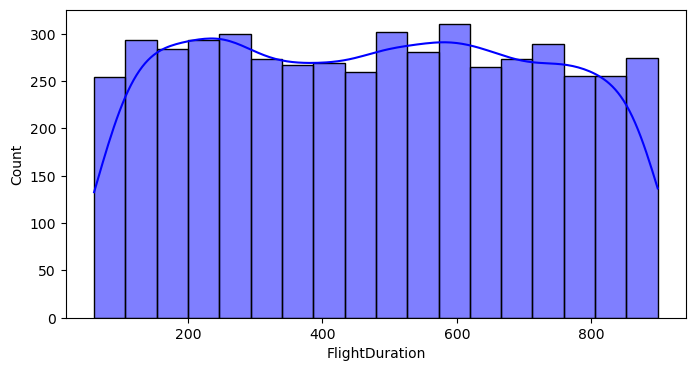

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df["FlightDuration"], color="blue", kde=True)
plt.show()

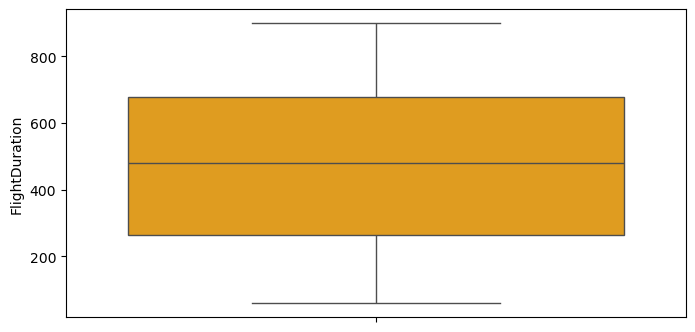

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(df["FlightDuration"], color="orange")
plt.show()

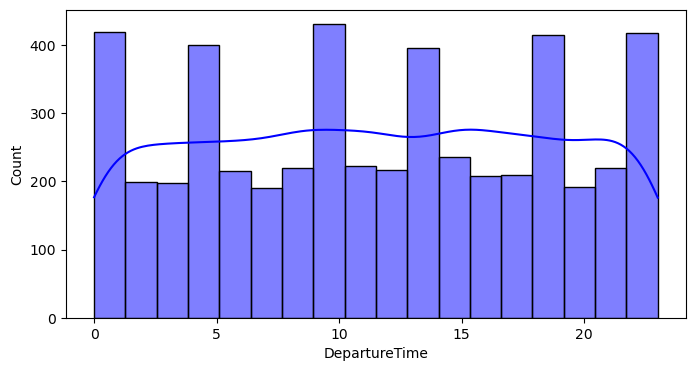

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df["DepartureTime"], color="blue", kde=True)
plt.show()

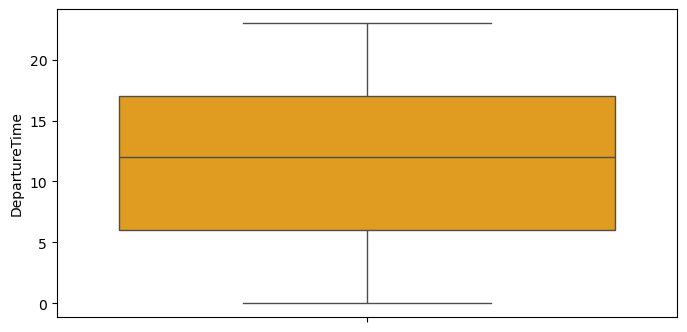

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(df["DepartureTime"], color="orange")
plt.show()

#### Plot for all numerical data

In [21]:
numerical_columns = df.select_dtypes(include="number").columns

In [22]:
len(numerical_columns)

10

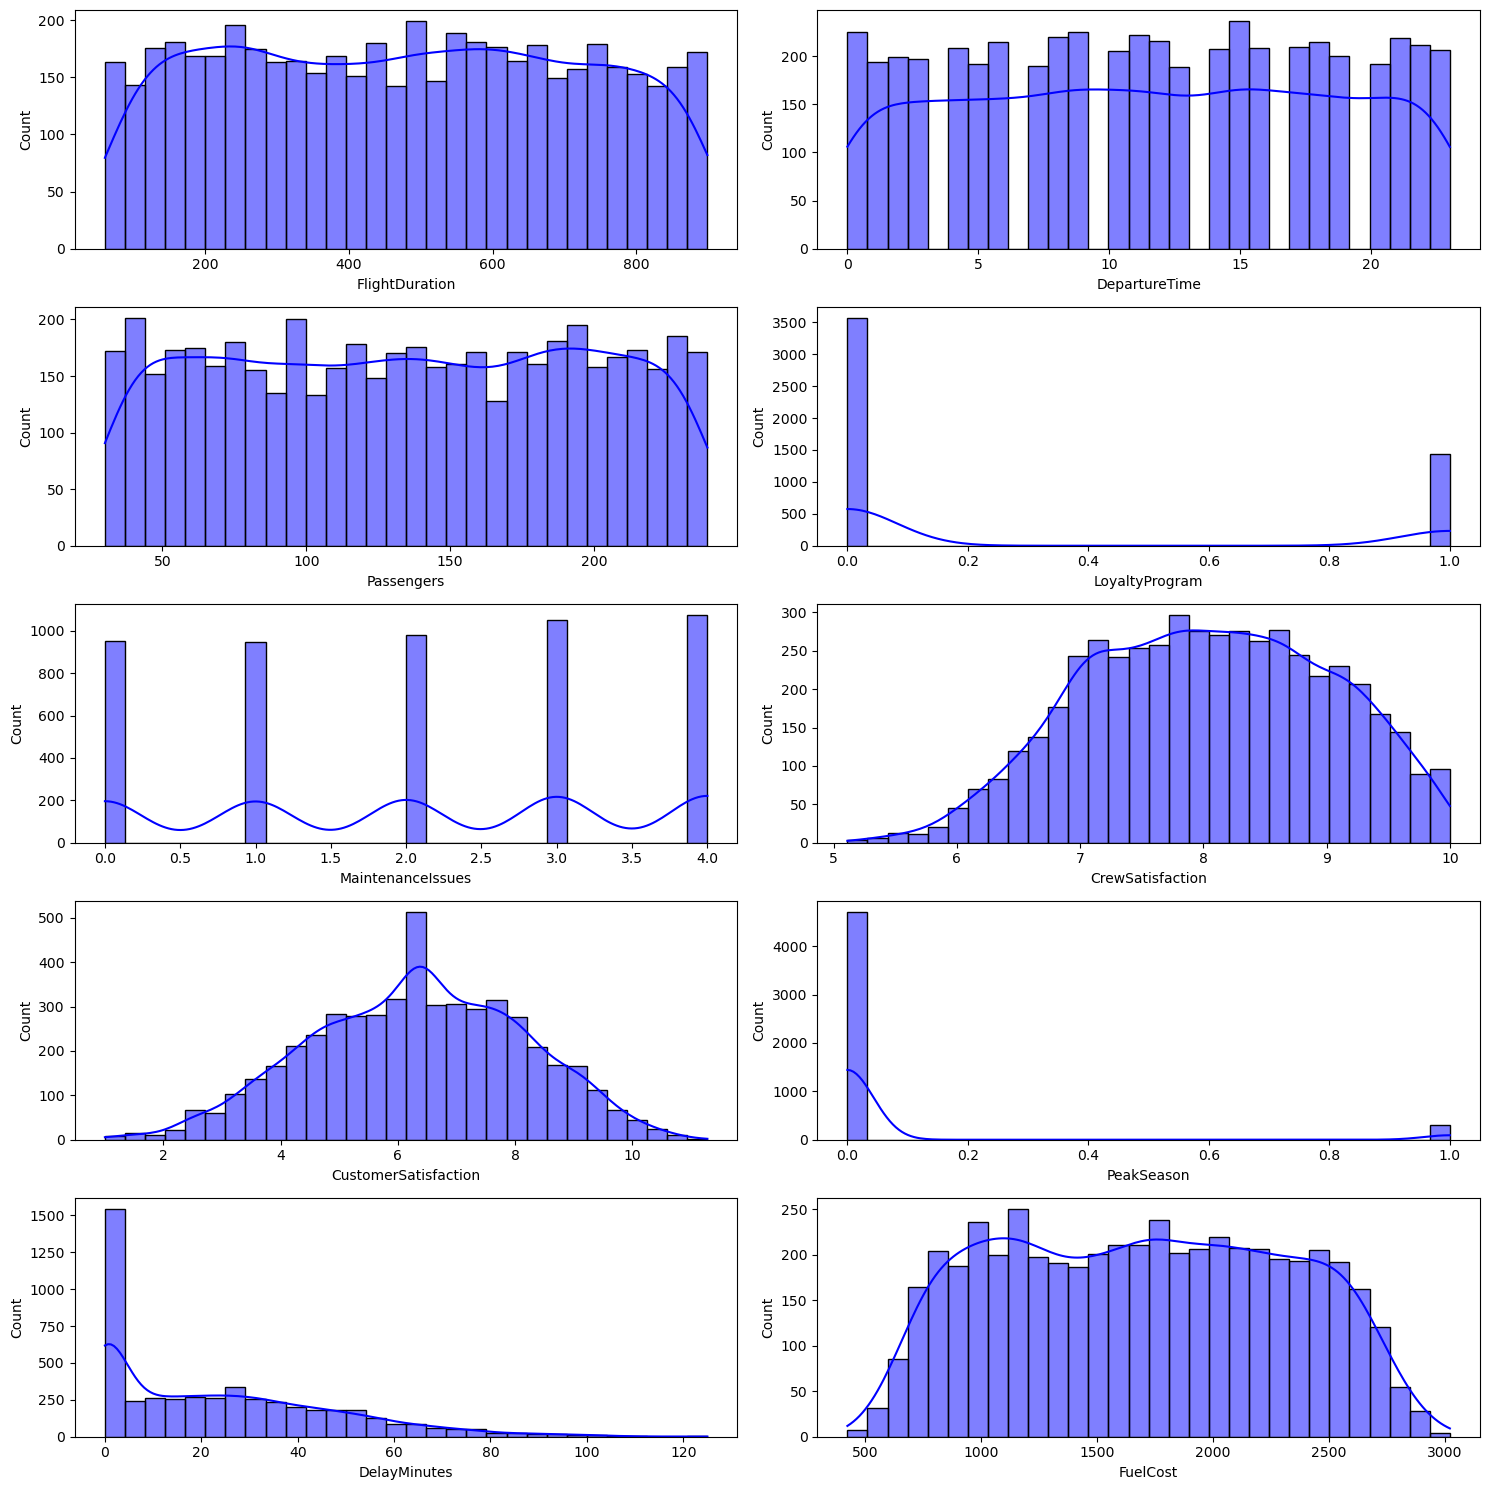

In [23]:
fig, position = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.histplot(df[column_name], color="blue", bins=30, kde=True, ax=position[index])

plt.tight_layout()
plt.show()

***Insights:***

`CrewSatisfaction` column is slightly skewed to the right, indicating posible outliers in that columns. 

#### Confirm outliers using boxplot

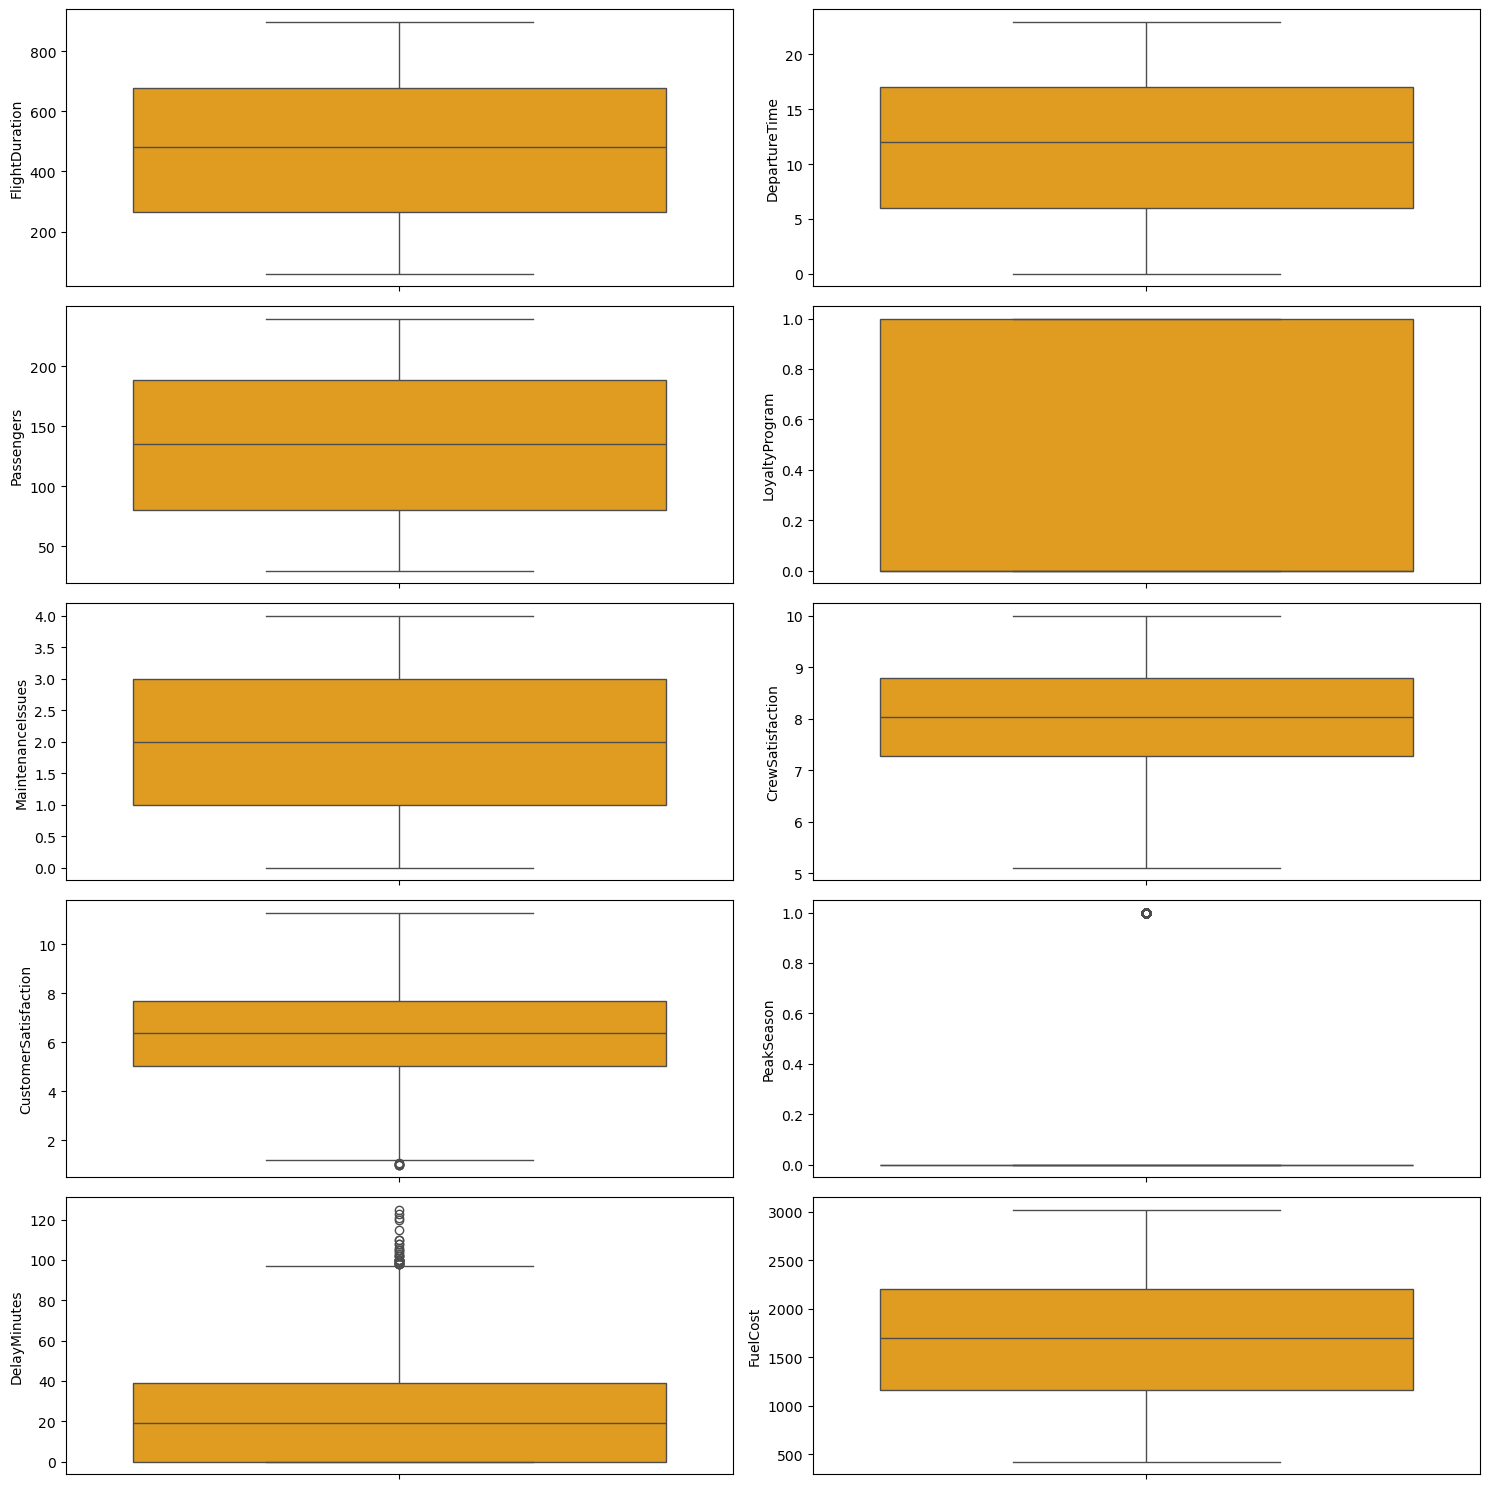

In [24]:
fig, position = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.boxplot(df[column_name], color="orange", ax=position[index])

plt.tight_layout()
plt.show()

### 3. Lets handle outliers using IQR

In [25]:
q1 = df[["DelayMinutes"]].quantile(0.25)
q3 = df[["DelayMinutes"]].quantile(0.75)

In [26]:
iqr = q3 - q1

In [27]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [28]:
df[["DelayMinutes"]] = df[["DelayMinutes"]].clip(lower_bound, upper_bound, axis=1)

### Lets visualize the boxplot again to verify if the outliers are gone

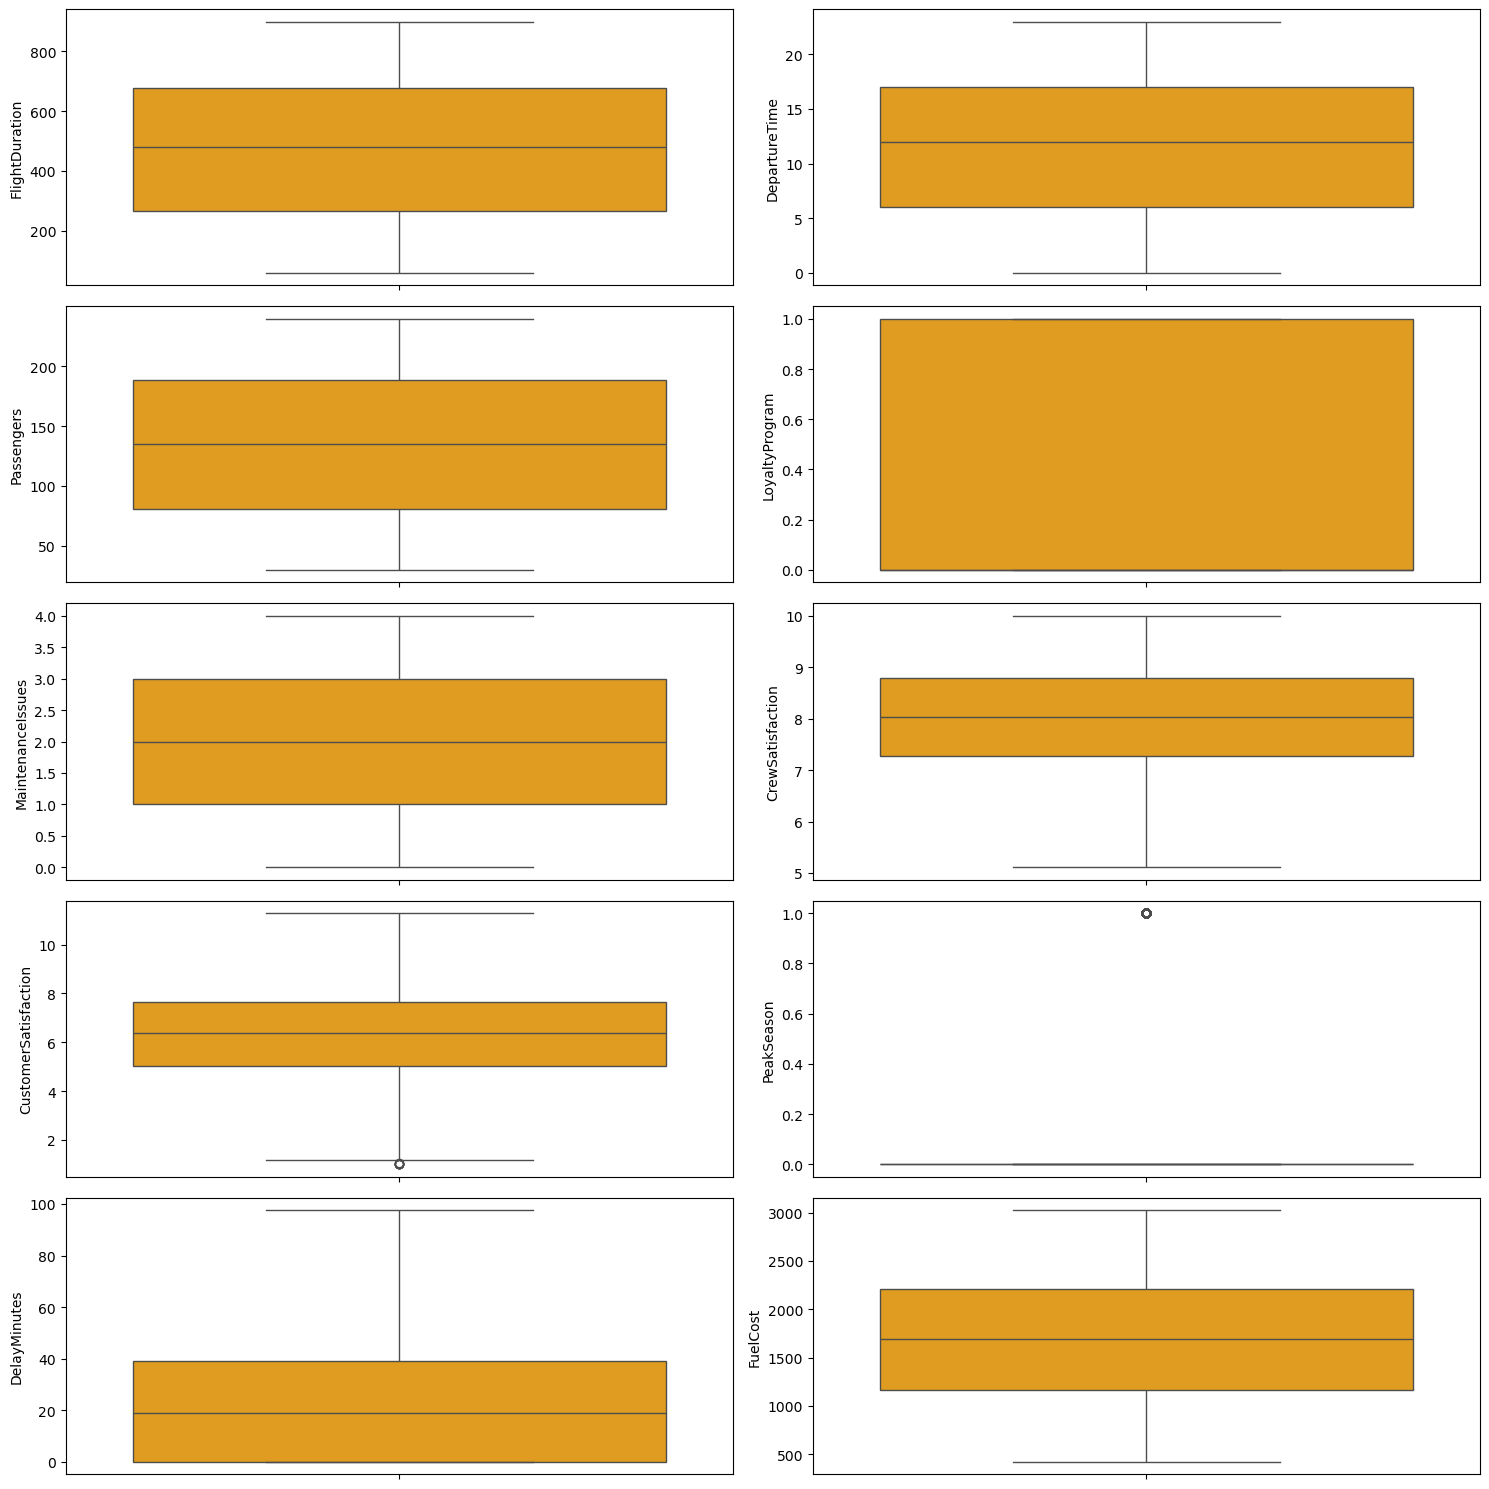

In [29]:
fig, position = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.boxplot(df[column_name], color="orange", ax=position[index])

plt.tight_layout()
plt.show()

### Seasonal Trends Analysis

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b')
df.sort_values(by="Date", inplace=True)

In [31]:
df.head(2)

,Date,Route,Airline,AircraftType,FlightDuration,DepartureTime,Passengers,WeatherCondition,FlightClass,TicketType,...,LoyaltyProgram,MaintenanceIssues,CrewSatisfaction,CustomerSatisfaction,Weekday,PeakSeason,DelayMinutes,OnTimeArrival,FuelCost,Month
4245,2022-01-01,Mumbai to Dubai,BlueJet Airlines,Airbus A380,555,11,193.2,Fog,Business,Non-refundable,...,1,3,9.942984,8.323130,Saturday,0,0.0,Yes,1886.91,Jan
4947,2022-01-01,Berlin to Madrid,Sunshine Air,Boeing 777,248,7,190.8,Clear,Business,Non-refundable,...,1,2,7.228512,5.518936,Saturday,0,0.0,Yes,1216.29,Jan


In [32]:
numerical_columns

Index(['FlightDuration', 'DepartureTime', 'Passengers', 'LoyaltyProgram',
       'MaintenanceIssues', 'CrewSatisfaction', 'CustomerSatisfaction',
       'PeakSeason', 'DelayMinutes', 'FuelCost'],
      dtype='object')

#### Seasonal trends in PeakSeason

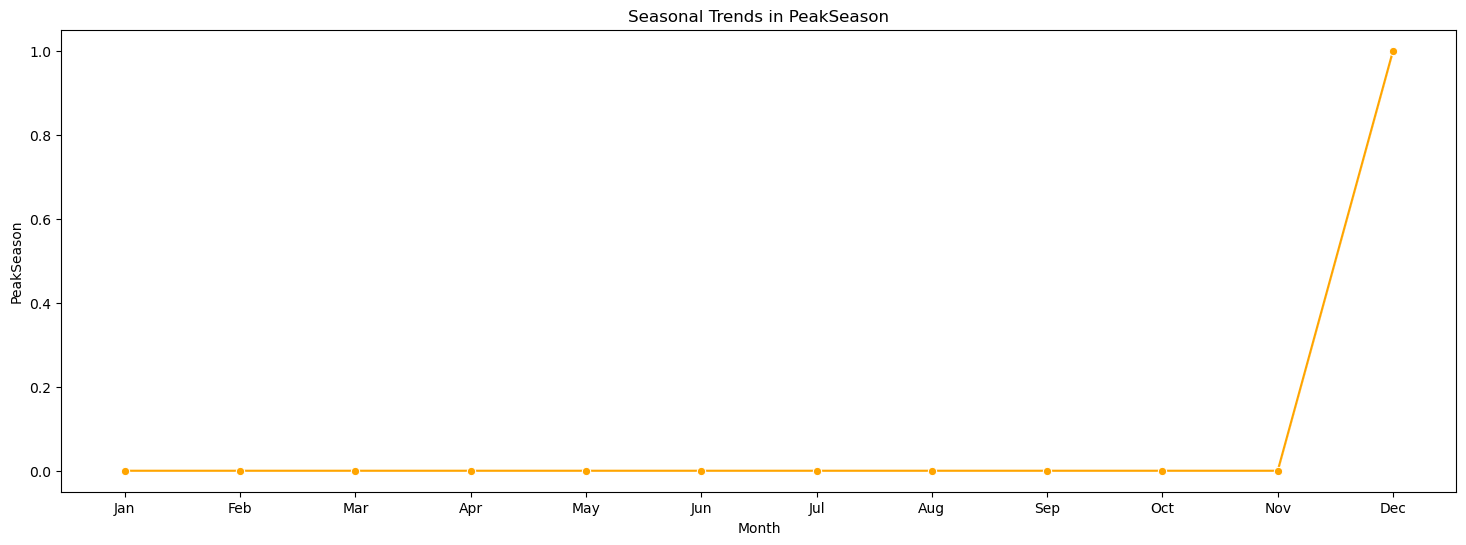

In [33]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Month', y='PeakSeason', data=df, marker='o', color='orange')
plt.title('Seasonal Trends in PeakSeason')
plt.xlabel('Month')
plt.ylabel('PeakSeason')
plt.show()


***Insights:***

- As expected the peak seasons rises around holiday seasons (Nov-Jan).


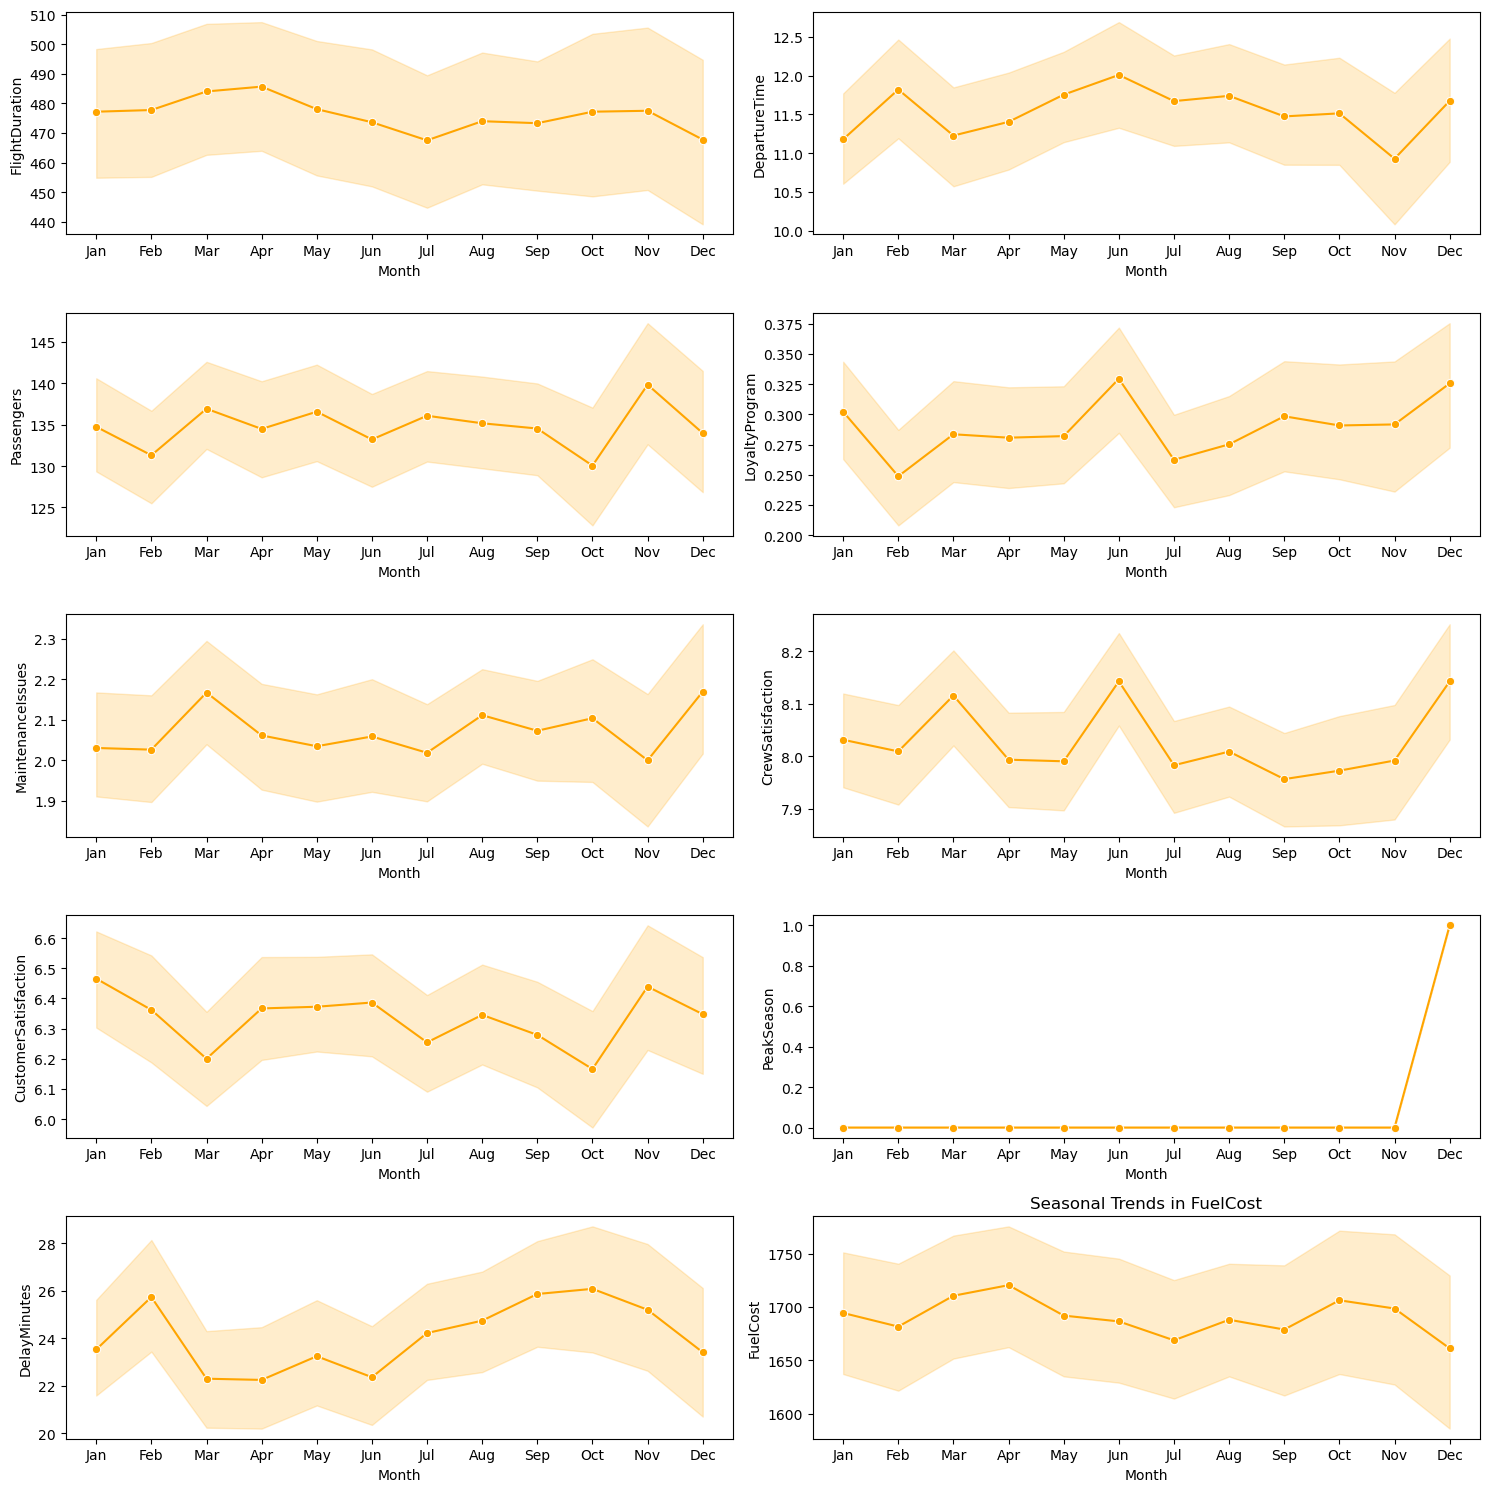

In [34]:
fig, position = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.lineplot(x='Month', y=column_name, data=df, marker='o', color='orange', ax=position[index])
    plt.title(f'Seasonal Trends in {column_name}')
    plt.xlabel('Month')
    plt.ylabel(column_name)

plt.tight_layout()
plt.show()

### Unvariate Analysis (Categorical data)

In [35]:
categorical_columns = df.select_dtypes(include="object").columns

In [36]:
categorical_columns

Index(['Route', 'Airline', 'AircraftType', 'WeatherCondition', 'FlightClass',
       'TicketType', 'DestinationRegion', 'Weekday', 'OnTimeArrival', 'Month'],
      dtype='object')

In [37]:
len(categorical_columns)

10

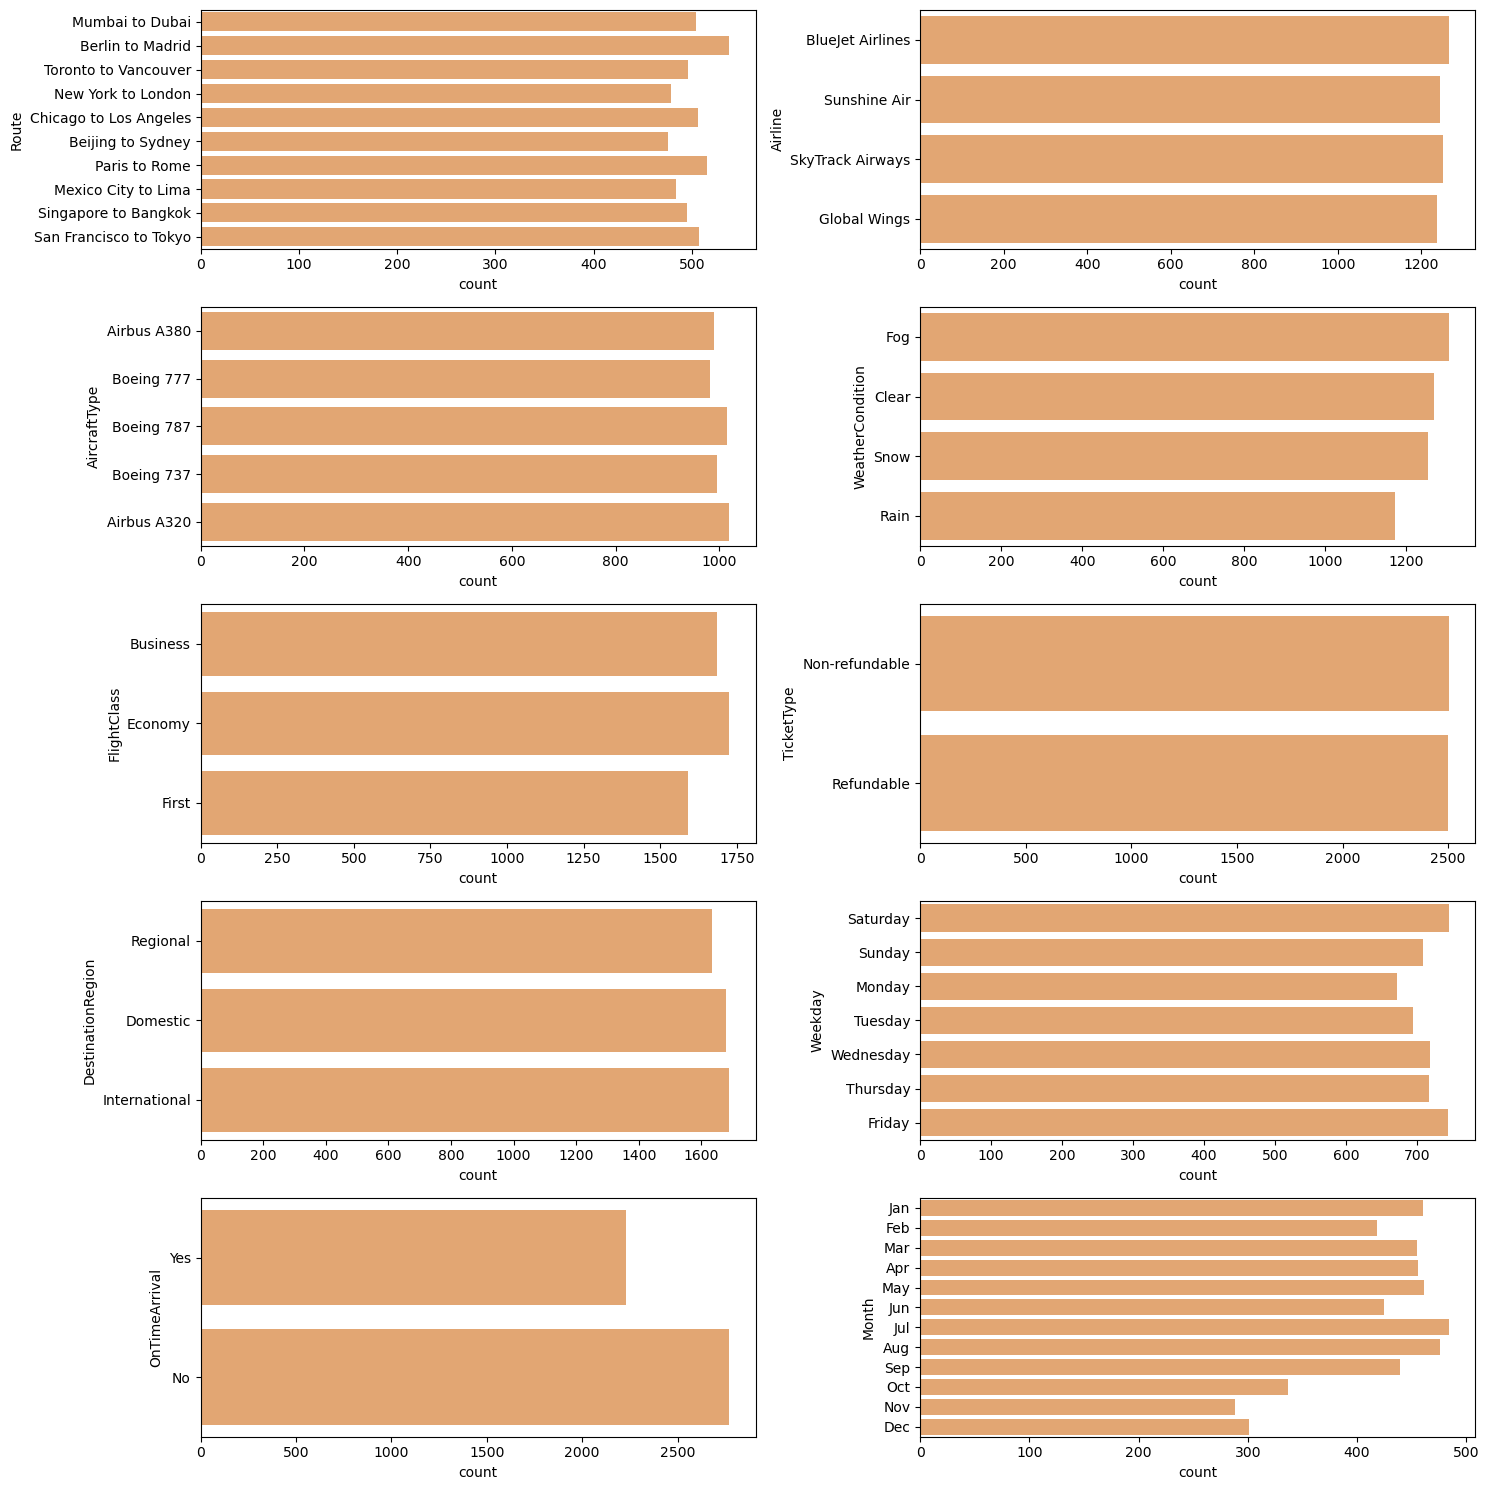

In [38]:
fig, position = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(categorical_columns):
    sns.countplot(df[column_name], color="sandybrown", ax=position[index])

plt.tight_layout()
plt.show()

### Bivariate analysis
Bivariate analysis examines the relationship between two variables, typically with one independent variable and one dependent variable.

Numerical vs Numerical:
- We can use scatter plots, line plot, hexbin, Regression plot, box plot, violin plot, or correlation map.

Numerical vs Categorical:
- We can use bar plot, box plots, violin plots, or swarm plots.
  
Categorical vs Categorical:
- We can use stacked bar plots or grouped bar plots.

In [39]:
df.head(1)

,Date,Route,Airline,AircraftType,FlightDuration,DepartureTime,Passengers,WeatherCondition,FlightClass,TicketType,...,LoyaltyProgram,MaintenanceIssues,CrewSatisfaction,CustomerSatisfaction,Weekday,PeakSeason,DelayMinutes,OnTimeArrival,FuelCost,Month
4245,2022-01-01,Mumbai to Dubai,BlueJet Airlines,Airbus A380,555,11,193.2,Fog,Business,Non-refundable,...,1,3,9.942984,8.32313,Saturday,0,0.0,Yes,1886.91,Jan


#### Numerical vs Numerical:

1. Correlation Between `DelayMinutes` and `CustomerSatisfaction`

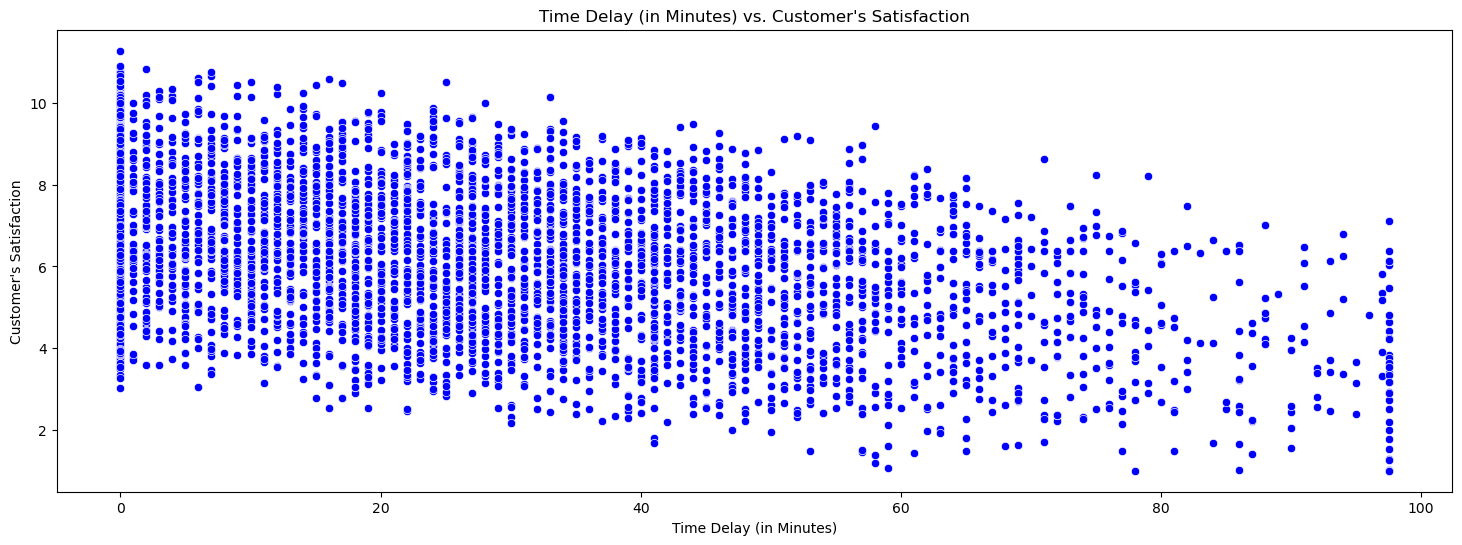

In [40]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='DelayMinutes', y='CustomerSatisfaction', data=df, color='blue')
plt.title("Time Delay (in Minutes) vs. Customer's Satisfaction")
plt.xlabel("Time Delay (in Minutes)")
plt.ylabel("Customer's Satisfaction")
plt.show()

2. Correlation Between `LoyaltyProgram` and `CustomerSatisfaction`

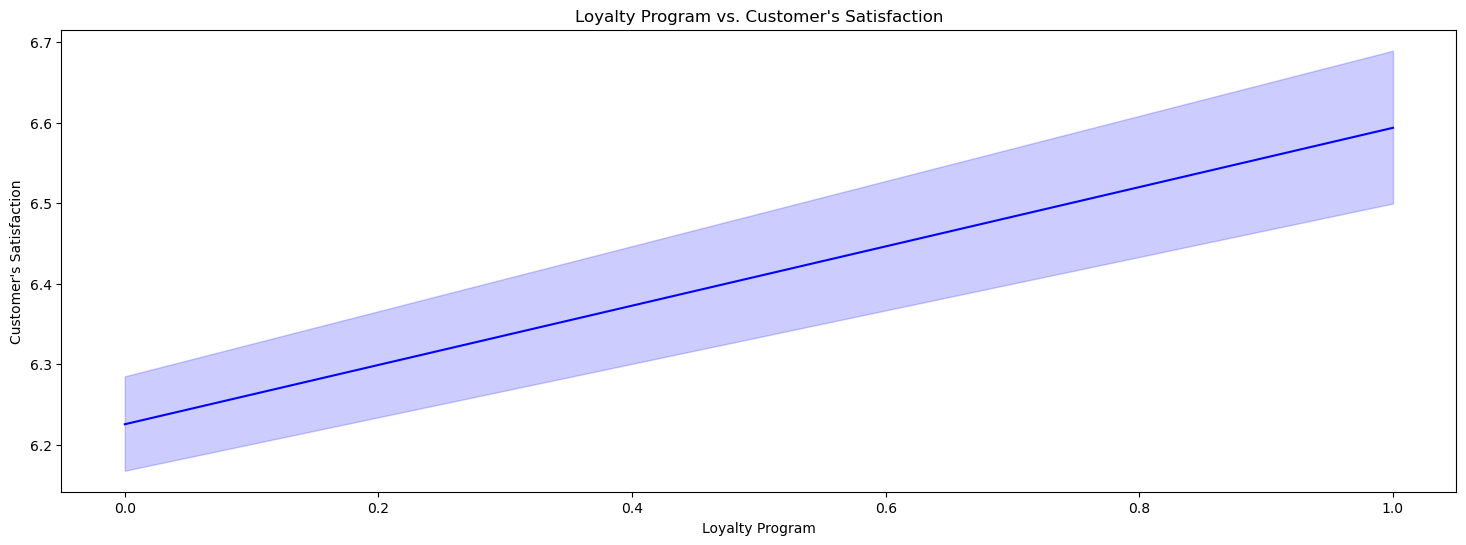

In [41]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='LoyaltyProgram', y='CustomerSatisfaction', data=df, color='blue')
plt.title("Loyalty Program vs. Customer's Satisfaction")
plt.xlabel("Loyalty Program")
plt.ylabel("Customer's Satisfaction")
plt.show()

3. Correlation Between `DelayMinutes` and `CustomerSatisfaction`

<Figure size 1800x600 with 0 Axes>

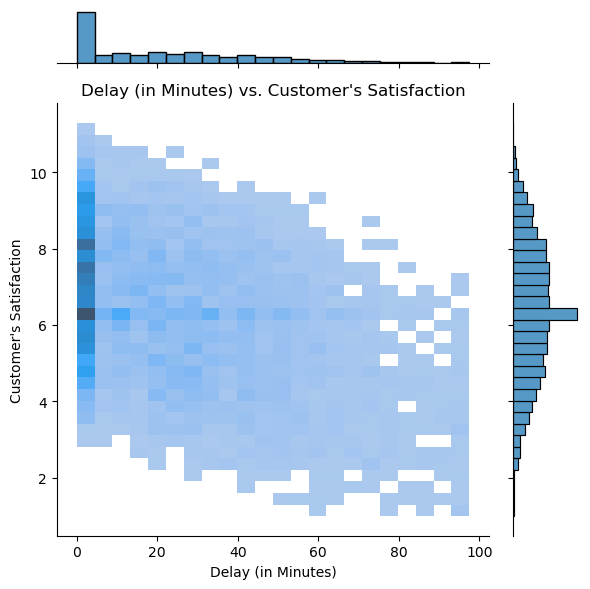

In [42]:
plt.figure(figsize=(18, 6))
sns.jointplot(x='DelayMinutes', y='CustomerSatisfaction', kind="hist", data=df)
plt.xlabel("Delay (in Minutes)")
plt.ylabel("Customer's Satisfaction")
plt.title("Delay (in Minutes) vs. Customer's Satisfaction")
plt.tight_layout()
plt.show()

4. Correlation Between `MaintenanceIssues` and `CustomerSatisfaction`

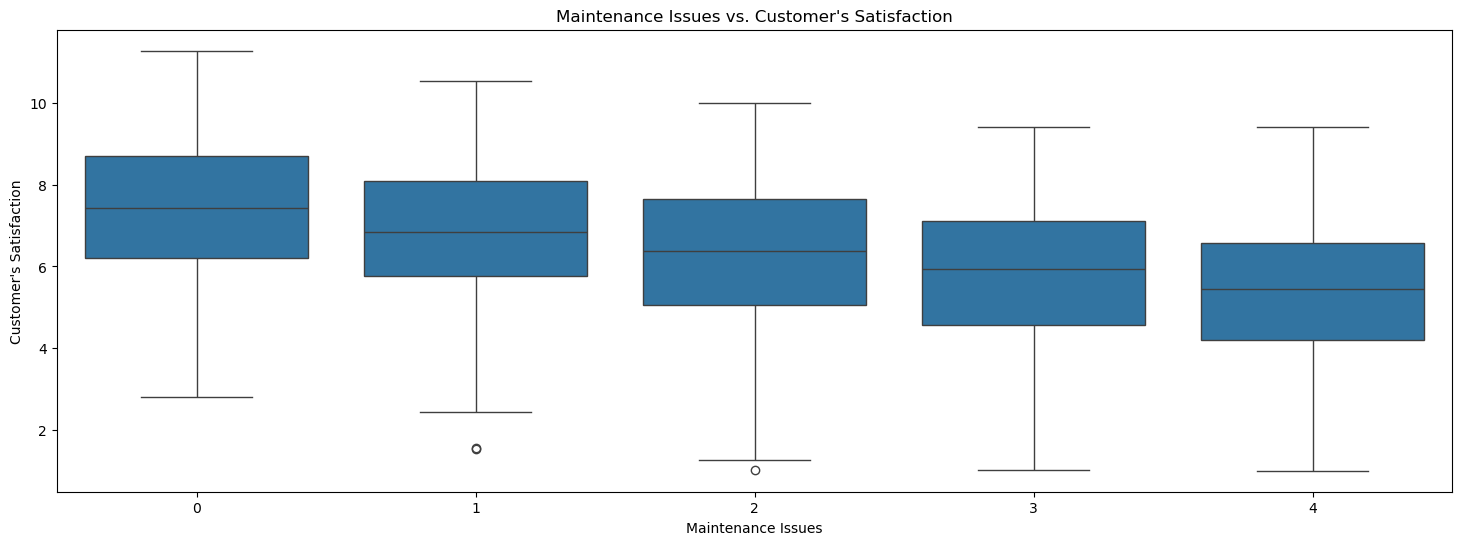

In [43]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='MaintenanceIssues', y='CustomerSatisfaction', data=df)
plt.xlabel("Maintenance Issues")
plt.ylabel("Customer's Satisfaction")
plt.title("Maintenance Issues vs. Customer's Satisfaction")

plt.show()

5. Correlation Between `MaintenanceIssues` and `CustomerSatisfaction`

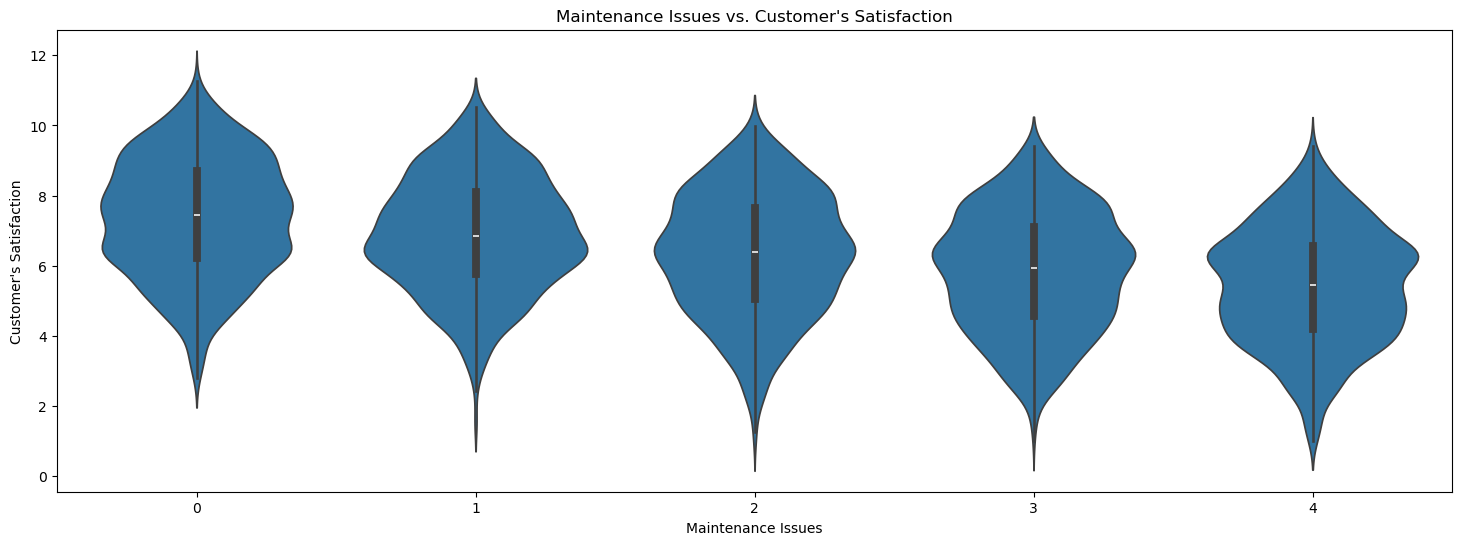

In [44]:
plt.figure(figsize=(18, 6))
sns.violinplot(x='MaintenanceIssues', y='CustomerSatisfaction', data=df)
plt.xlabel("Maintenance Issues")
plt.ylabel("Customer's Satisfaction")
plt.title("Maintenance Issues vs. Customer's Satisfaction")

plt.show()

6. Correlation Between `FlightDuration` and `FuelCost`

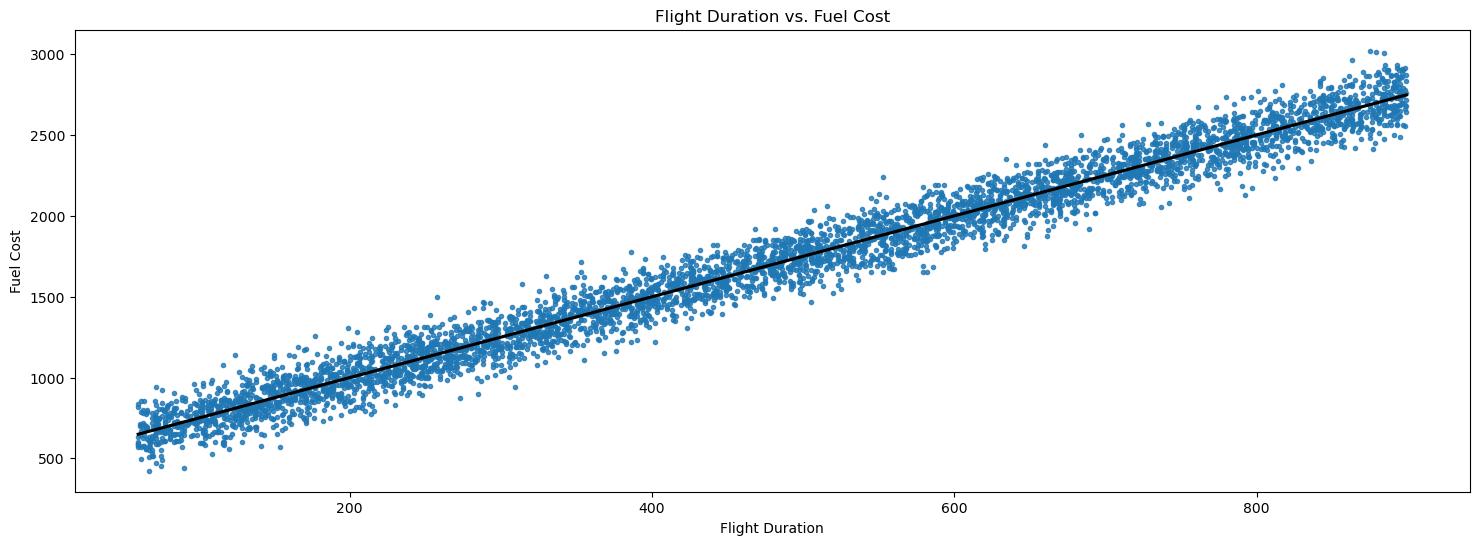

In [45]:
plt.figure(figsize=(18, 6))
sns.regplot(x='FlightDuration', y='FuelCost', data=df, line_kws={"color":"black"}, marker=".")
plt.xlabel("Flight Duration")
plt.ylabel("Fuel Cost")
plt.title("Flight Duration vs. Fuel Cost")

plt.show()

7. Correlation Heatmap

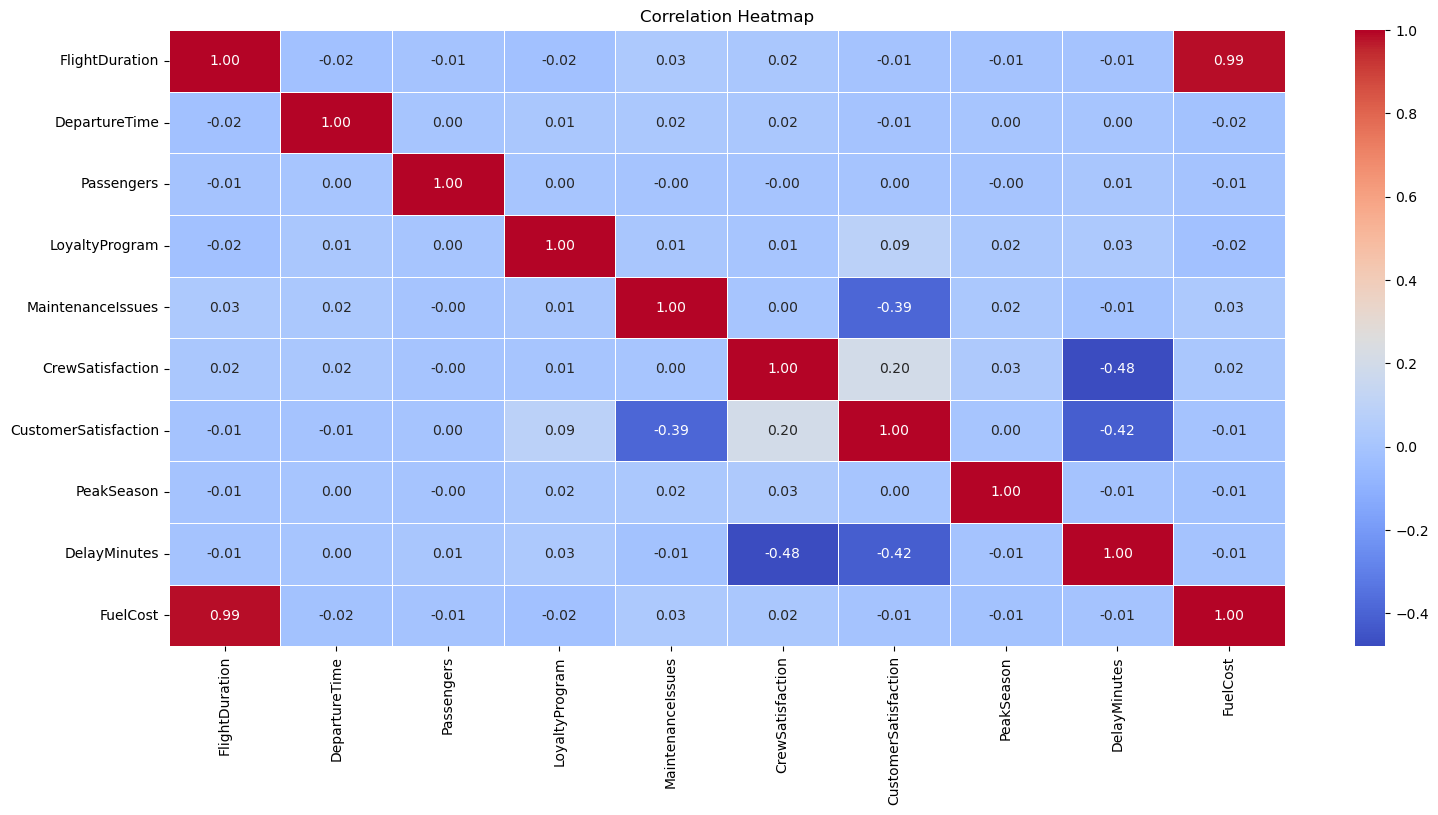

In [46]:
plt.figure(figsize=(18, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Numerical vs Categorical:

CustomerSatisfaction and FlightClass

<Axes: xlabel='CustomerSatisfaction', ylabel='FlightClass'>

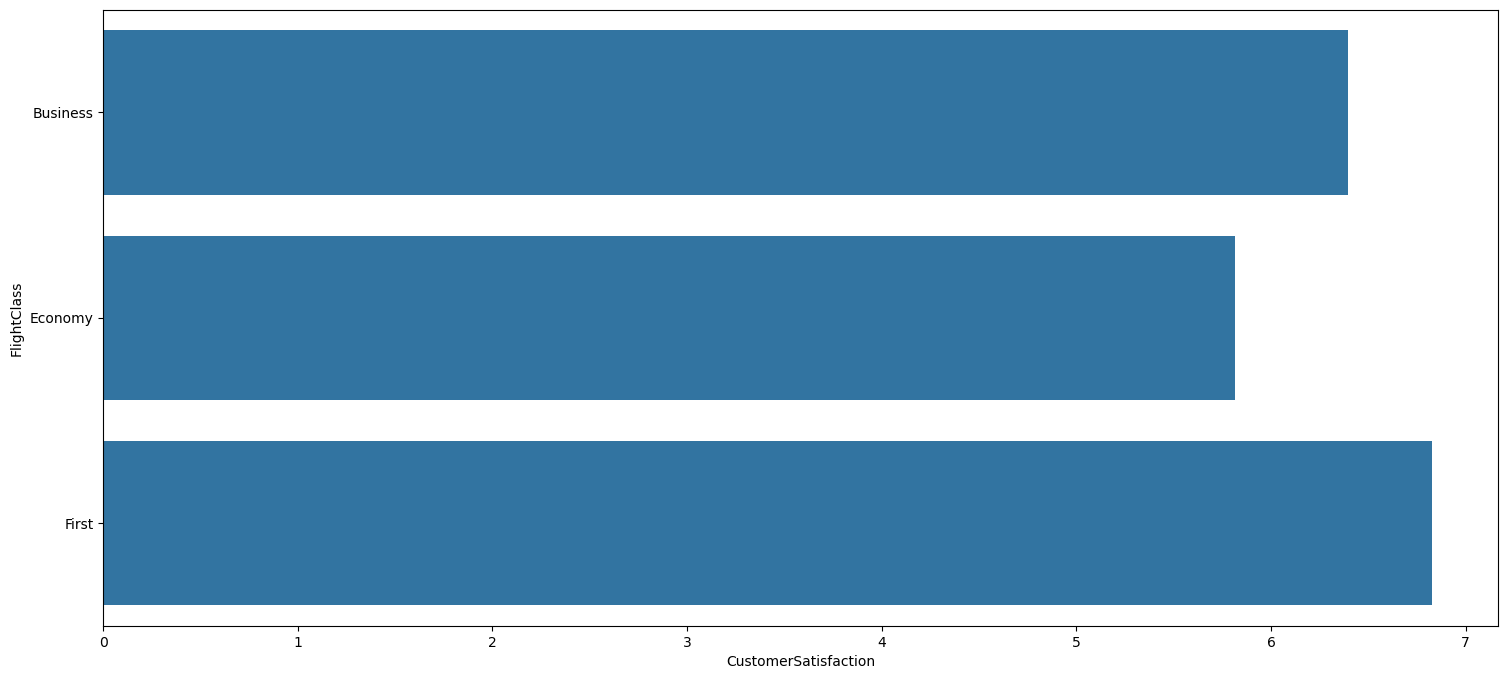

In [47]:
plt.figure(figsize=(18, 8))
sns.barplot(x="CustomerSatisfaction", y="FlightClass", orient="h", data=df, errorbar=None)

FlightDuration vs WeatherCondition

<Axes: xlabel='FlightDuration', ylabel='WeatherCondition'>

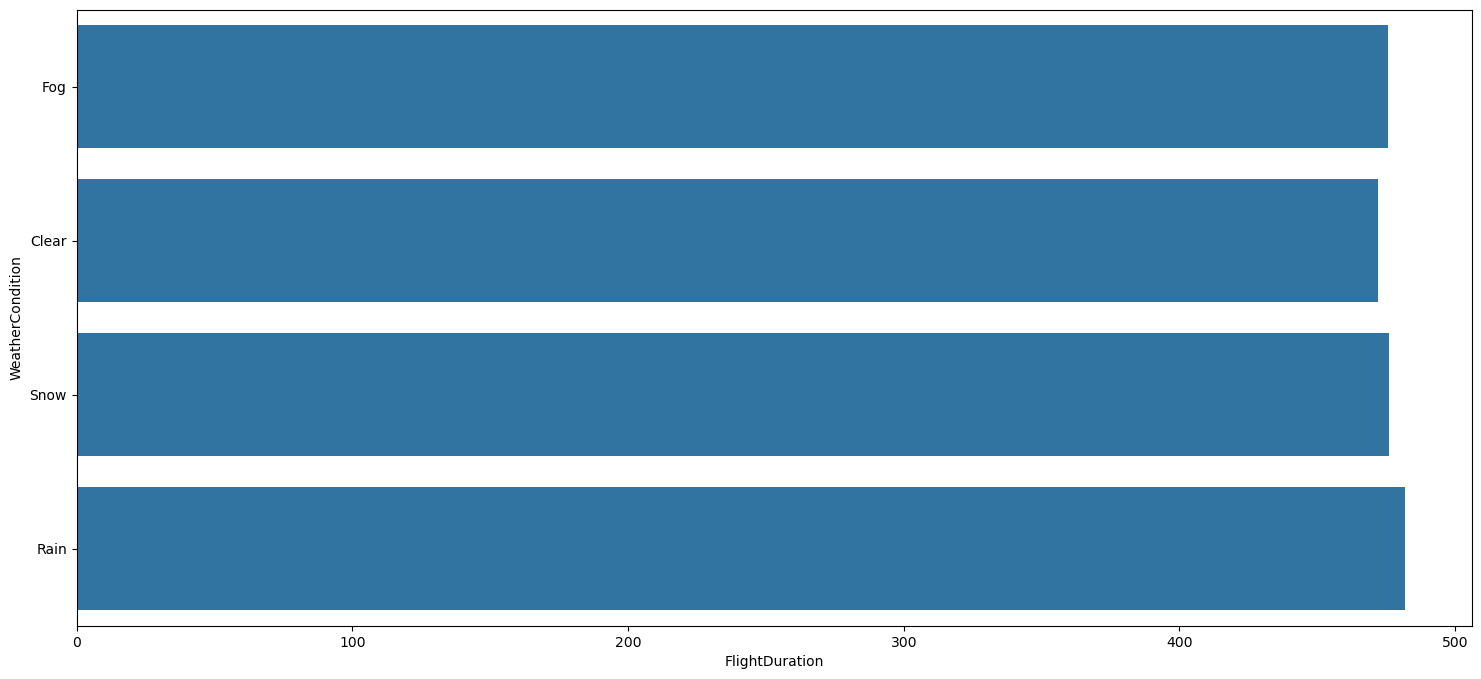

In [48]:
plt.figure(figsize=(18, 8))
sns.barplot(x="FlightDuration", y="WeatherCondition", orient="h", data=df, errorbar=None)

LoyaltyProgram vs TicketType

<Axes: xlabel='LoyaltyProgram', ylabel='TicketType'>

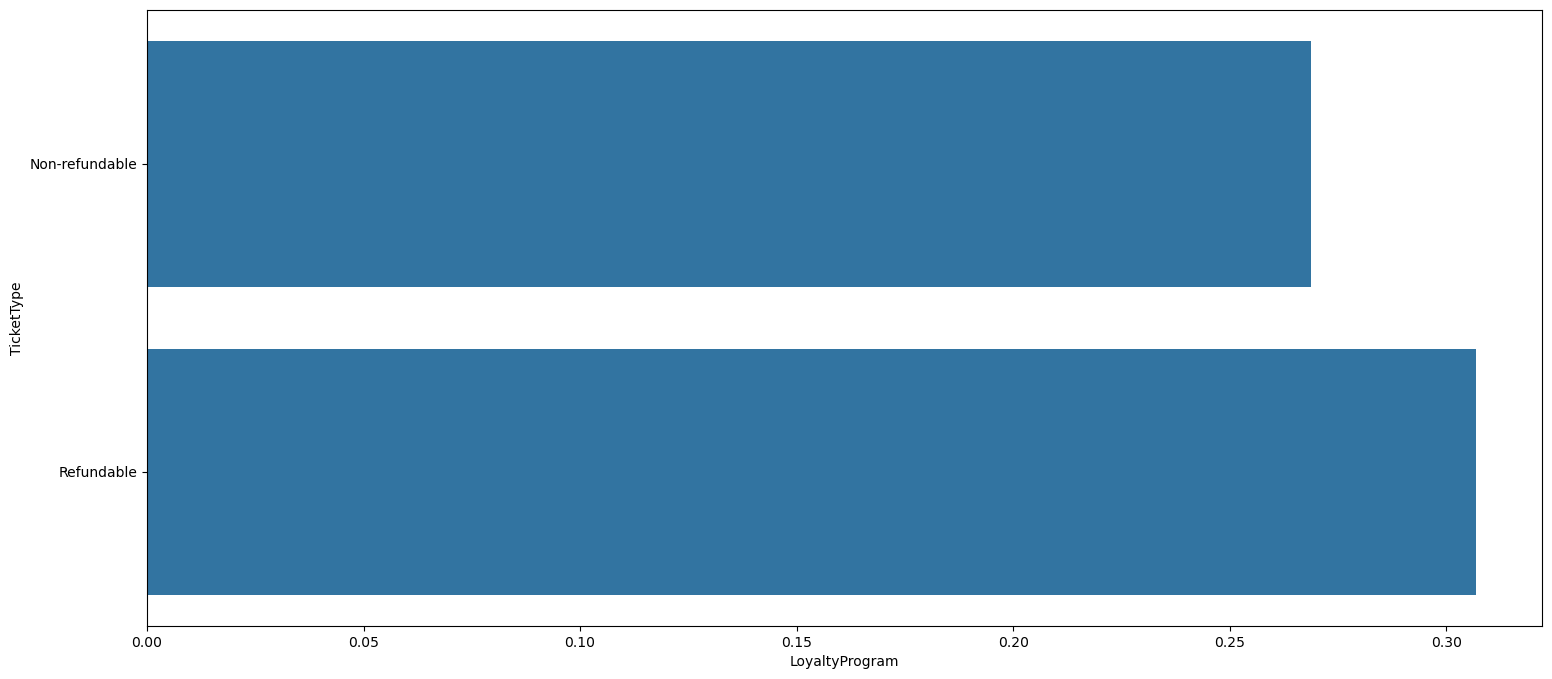

In [49]:
plt.figure(figsize=(18, 8))
sns.barplot(x="LoyaltyProgram", y="TicketType", data=df, errorbar=None)

#### Categorical vs Categorical:

### Grouped bar

`FlightClass` vs `TicketType`

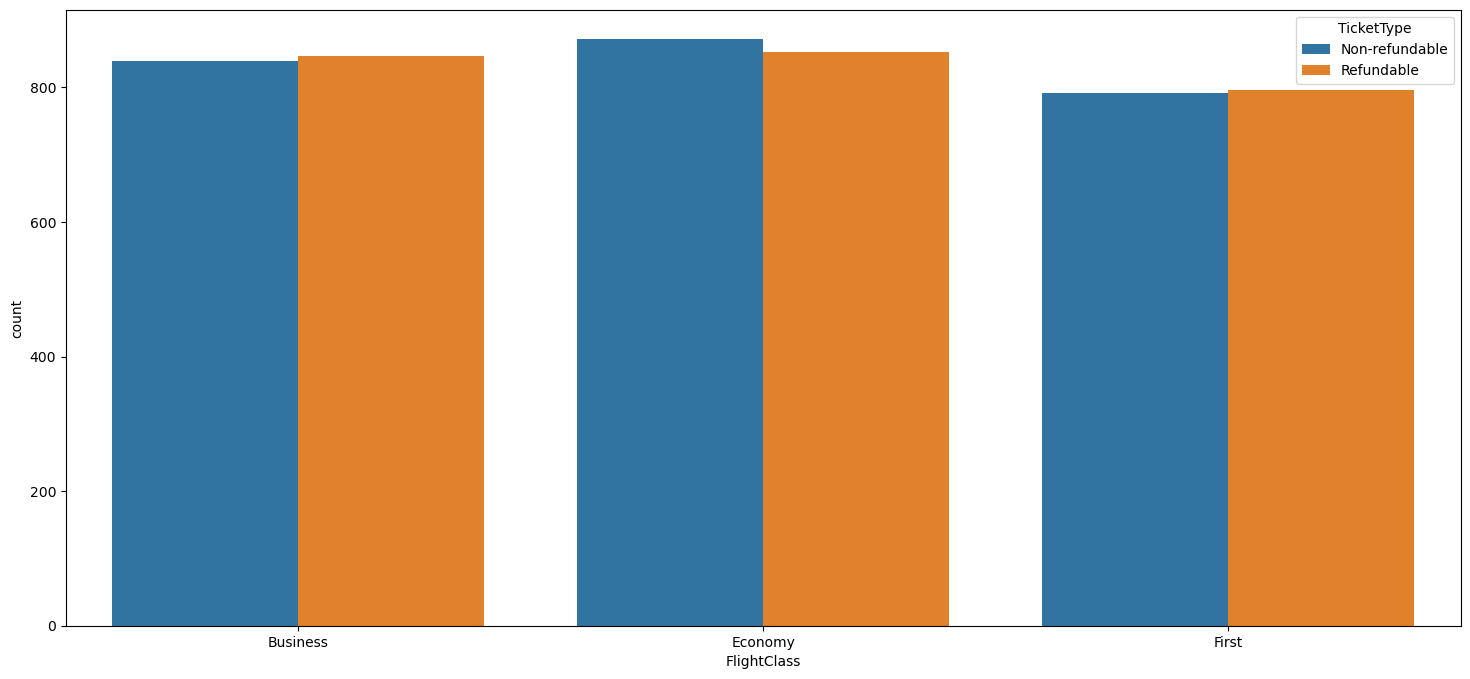

In [50]:
plt.figure(figsize=(18, 8))
sns.countplot(x="FlightClass", hue="TicketType", data=df)
plt.show()

### Stacked Bar

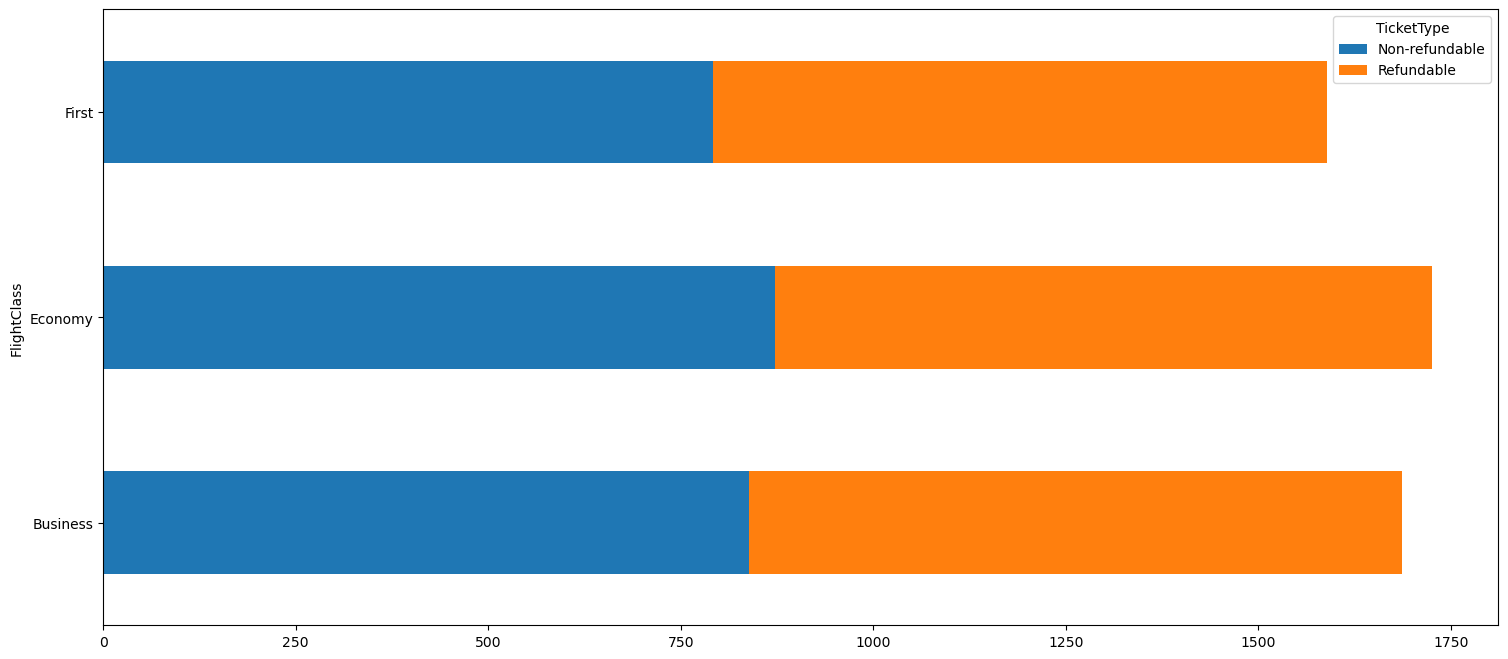

In [51]:
df_grouped = df.groupby(['FlightClass', 'TicketType'])["Date"].count().unstack()
df_grouped.plot(kind='barh', stacked=True, figsize=(18, 8))
plt.show()

`Route` vs. `OnTimeArrival`

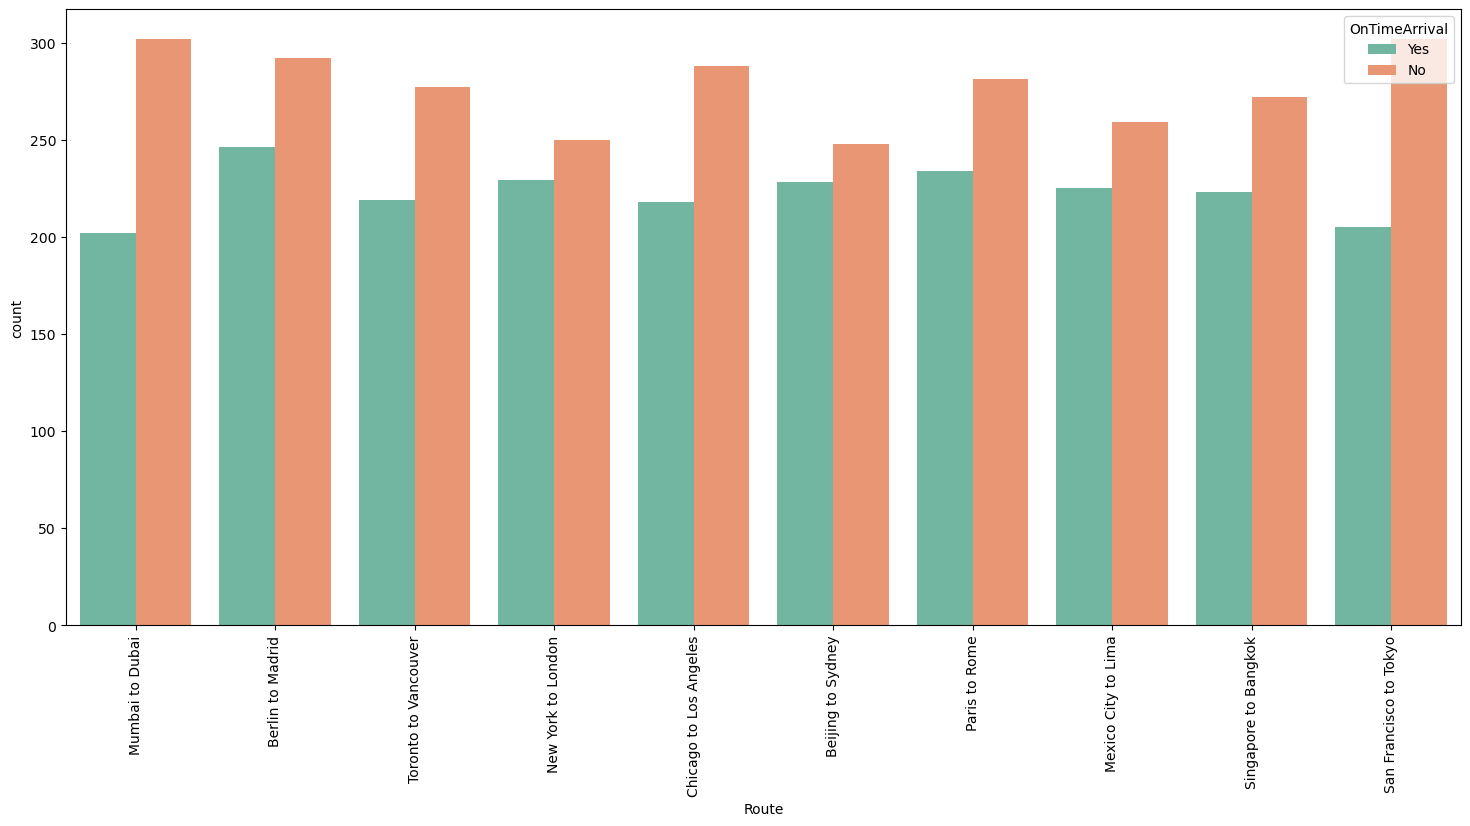

In [52]:
plt.figure(figsize=(18, 8))
sns.countplot(x="Route", hue="OnTimeArrival", data=df, palette="Set2")
plt.xticks(rotation=90)
plt.show()

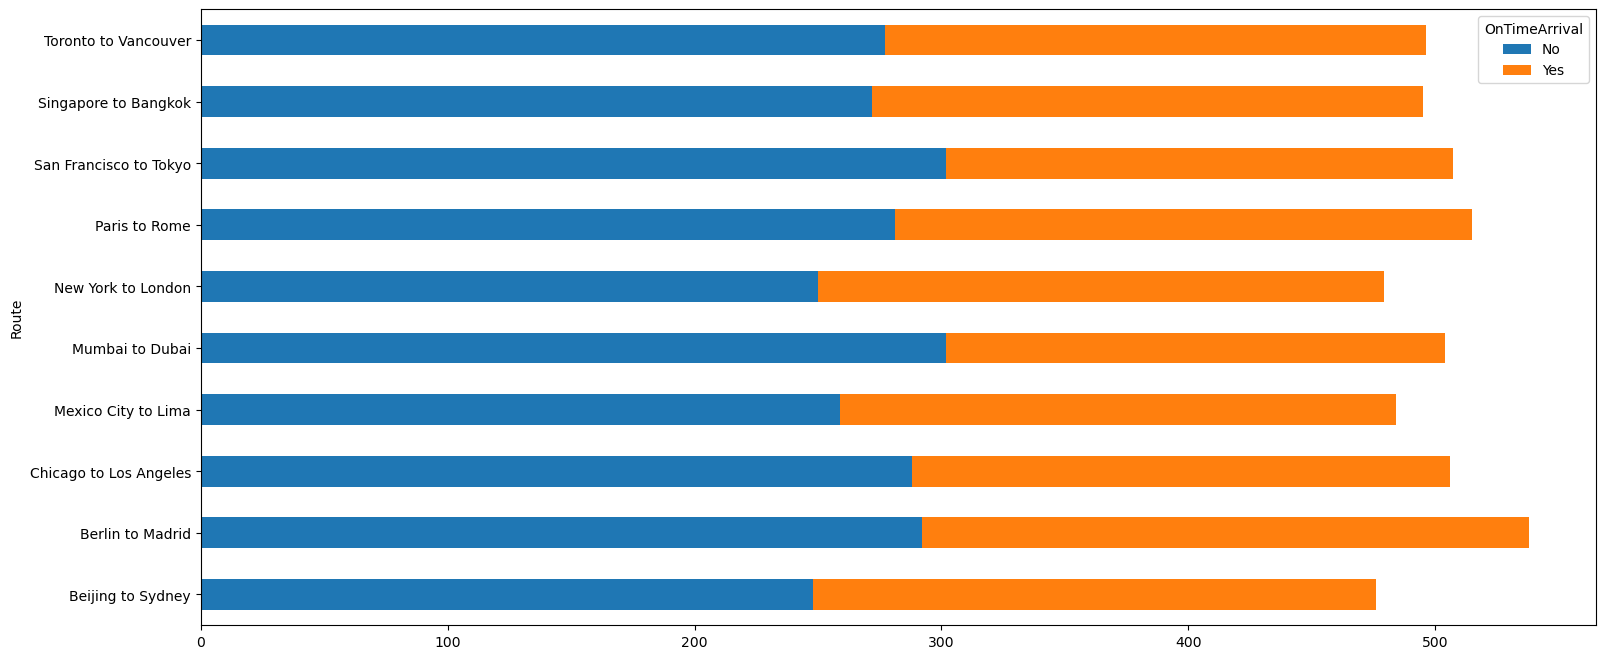

In [53]:
df_grouped = df.groupby(['Route', 'OnTimeArrival'])["Date"].count().unstack()
df_grouped.plot(kind='barh', stacked=True, figsize=(18, 8))
plt.show()

### Multivariate Analysis

#### Grouped bar

`FlightClass` and `DelayMinutes` by `DestinationRegion`

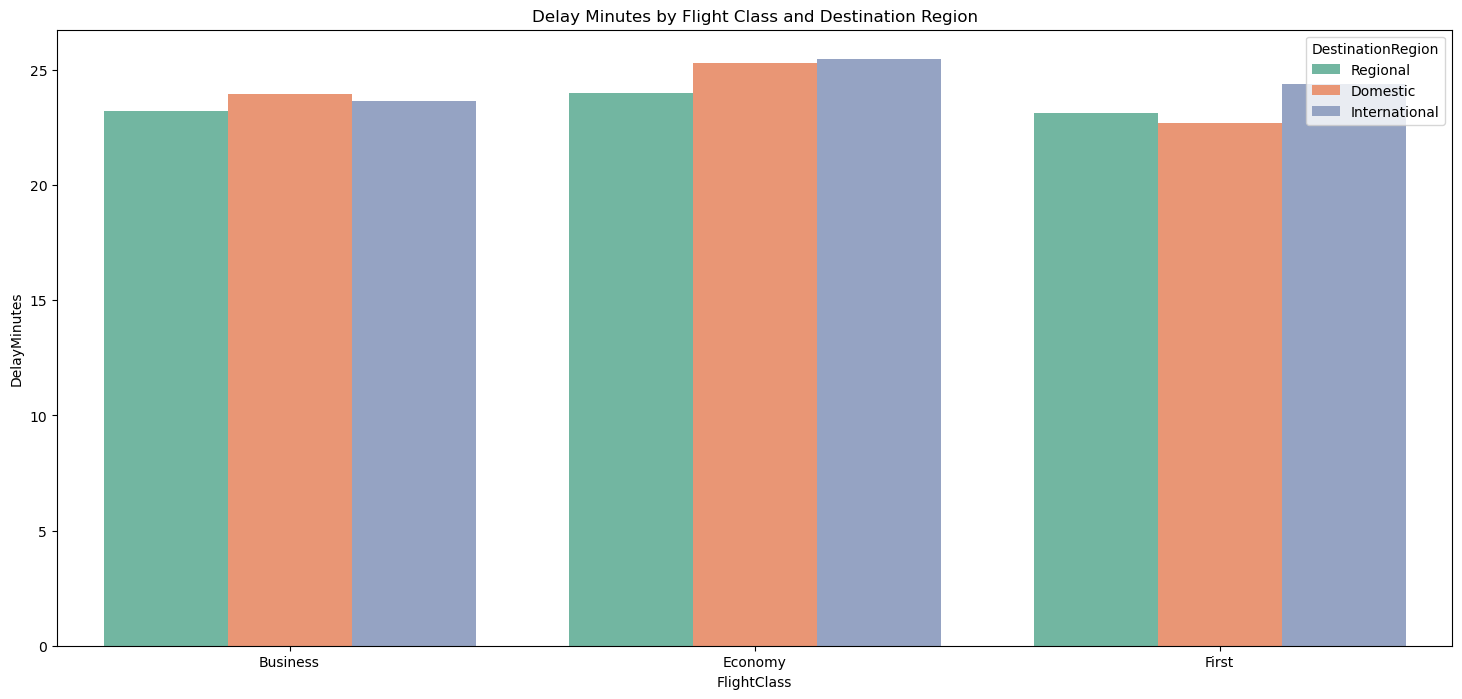

In [54]:
plt.figure(figsize=(18, 8))
sns.barplot(x="FlightClass", y="DelayMinutes", hue="DestinationRegion", data=df, palette="Set2", errorbar=None)
plt.title("Delay Minutes by Flight Class and Destination Region")
plt.show()

In [55]:
#### Stacked bar

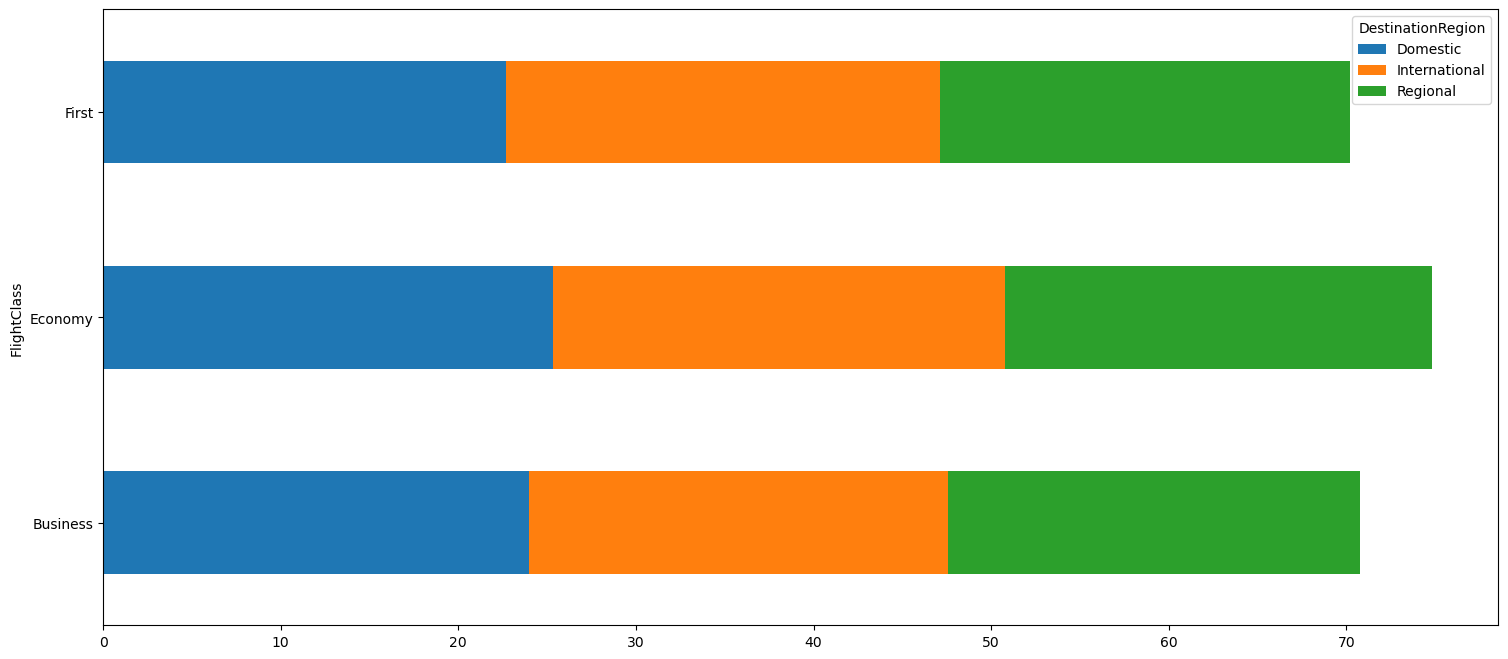

In [56]:
df_grouped = df.groupby(['FlightClass', 'DestinationRegion'])["DelayMinutes"].mean().unstack()
df_grouped.plot(kind='barh', stacked=True, figsize=(18, 8))
plt.show()

`CustomerSatisfaction` vs. `FlightClass` and `TicketType`

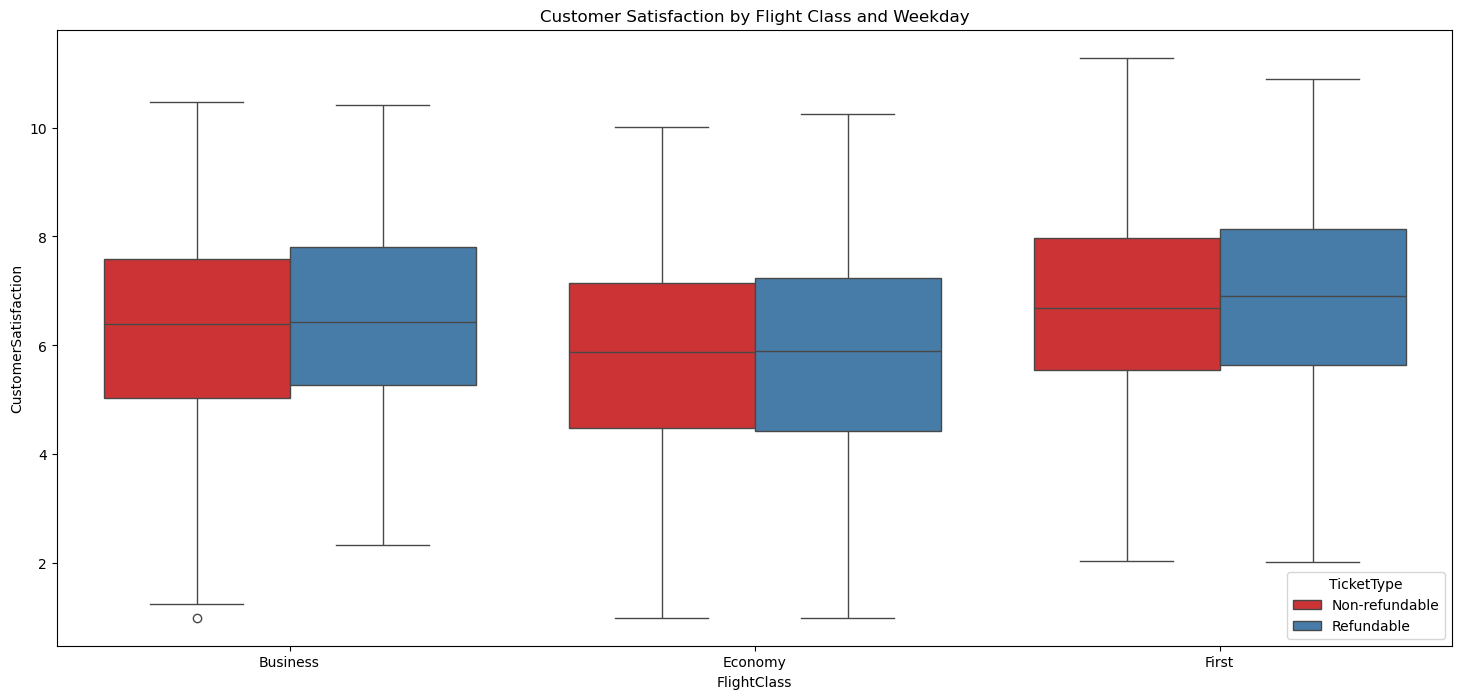

In [57]:
plt.figure(figsize=(18, 8))
sns.boxplot(x="FlightClass", y="CustomerSatisfaction", hue="TicketType", data=df, palette="Set1")
plt.title("Customer Satisfaction by Flight Class and Weekday")
plt.show()

***Insights:*** 

Customers that bought refundable tickets of any type of class are most satisfied.

`FuelCost` vs. `FlightDuration` by `Route`

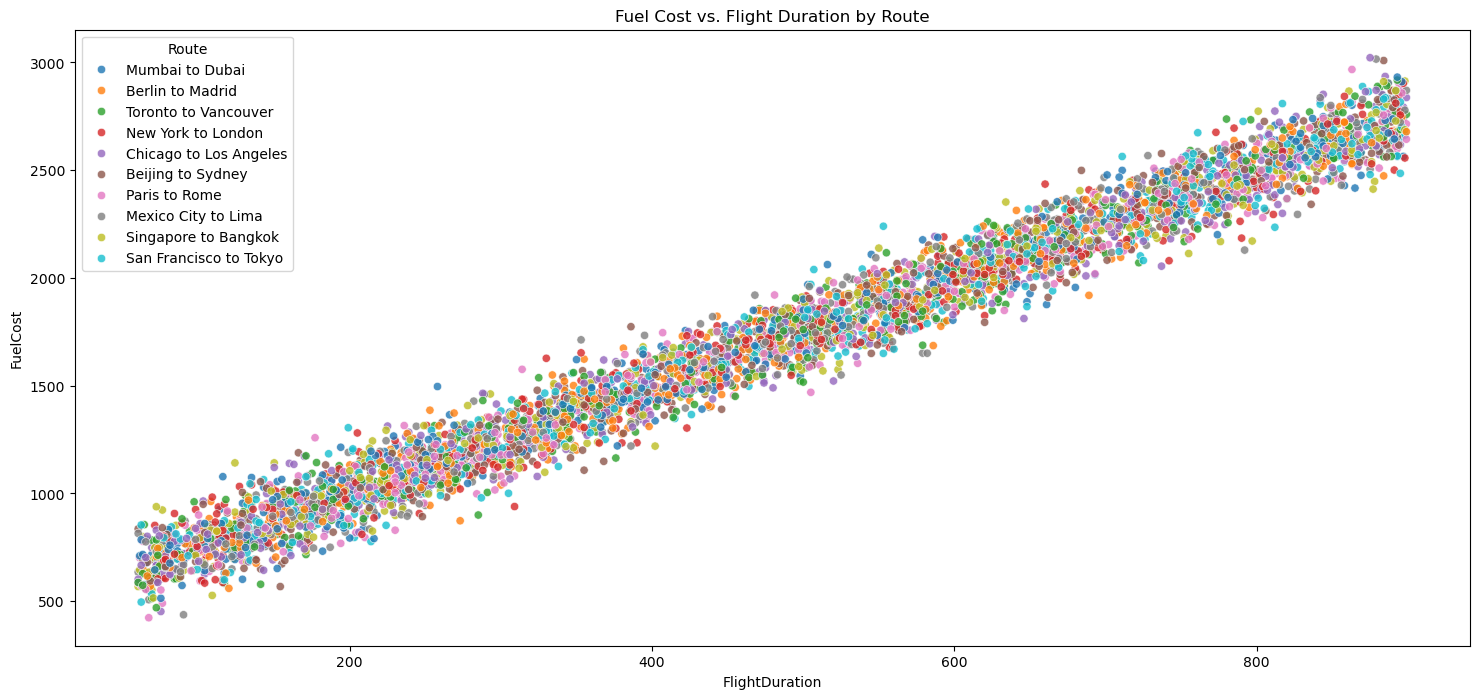

In [58]:
plt.figure(figsize=(18, 8))
sns.scatterplot(data=df, x='FlightDuration', y='FuelCost', hue='Route', alpha=0.8)
plt.title("Fuel Cost vs. Flight Duration by Route")
plt.show()

***Insights:*** 
- Flight duration increase with the cost of fuel as expected. But has no relationship with the route taken.

In [59]:
pivot_table = df.pivot_table(values='DelayMinutes', index='FlightClass', columns='Weekday', aggfunc='mean')

In [60]:
pivot_table.columns

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='Weekday')

Average `DelayMinutes` by `FlightClass` and `Weekday`

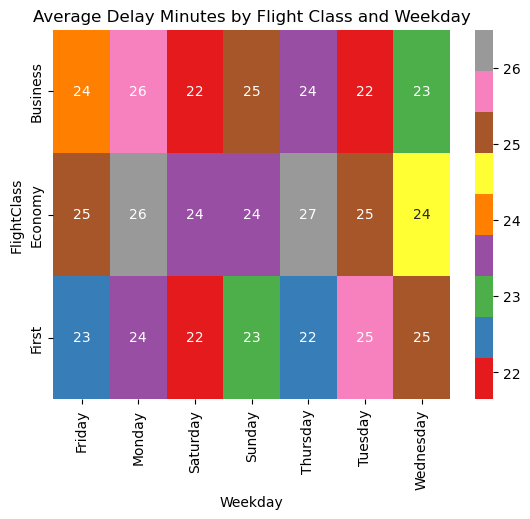

In [61]:
pivot_table = df.pivot_table(values='DelayMinutes', index='FlightClass', columns='Weekday', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='Set1')
plt.title("Average Delay Minutes by Flight Class and Weekday")
plt.show()

### Feature Engineering

In [62]:
# New Feature: DelayRate (Ratio of DelayMinutes to FlightDuration)
df['DelayRate'] = df['DelayMinutes'] / df['FlightDuration']

In [63]:
df.head(3)

,Date,Route,Airline,AircraftType,FlightDuration,DepartureTime,Passengers,WeatherCondition,FlightClass,TicketType,...,MaintenanceIssues,CrewSatisfaction,CustomerSatisfaction,Weekday,PeakSeason,DelayMinutes,OnTimeArrival,FuelCost,Month,DelayRate
4245,2022-01-01,Mumbai to Dubai,BlueJet Airlines,Airbus A380,555,11,193.2,Fog,Business,Non-refundable,...,3,9.942984,8.323130,Saturday,0,0.0,Yes,1886.91,Jan,0.000000
4947,2022-01-01,Berlin to Madrid,Sunshine Air,Boeing 777,248,7,190.8,Clear,Business,Non-refundable,...,2,7.228512,5.518936,Saturday,0,0.0,Yes,1216.29,Jan,0.000000
1591,2022-01-01,Toronto to Vancouver,Sunshine Air,Boeing 777,295,4,198.0,Fog,Economy,Non-refundable,...,1,7.237632,7.820856,Saturday,0,8.0,Yes,1145.03,Jan,0.027119


In [64]:
# New Feature: DelaySeverity (No Delay, Minor Delay, Major Delay)
df['DelaySeverity'] = pd.cut(df['DelayMinutes'], bins=[-1, 15, 60, np.inf], labels=["No Delay", "Minor Delay", "Major Delay"])

In [65]:
df.head(3)

,Date,Route,Airline,AircraftType,FlightDuration,DepartureTime,Passengers,WeatherCondition,FlightClass,TicketType,...,CrewSatisfaction,CustomerSatisfaction,Weekday,PeakSeason,DelayMinutes,OnTimeArrival,FuelCost,Month,DelayRate,DelaySeverity
4245,2022-01-01,Mumbai to Dubai,BlueJet Airlines,Airbus A380,555,11,193.2,Fog,Business,Non-refundable,...,9.942984,8.323130,Saturday,0,0.0,Yes,1886.91,Jan,0.000000,No Delay
4947,2022-01-01,Berlin to Madrid,Sunshine Air,Boeing 777,248,7,190.8,Clear,Business,Non-refundable,...,7.228512,5.518936,Saturday,0,0.0,Yes,1216.29,Jan,0.000000,No Delay
1591,2022-01-01,Toronto to Vancouver,Sunshine Air,Boeing 777,295,4,198.0,Fog,Economy,Non-refundable,...,7.237632,7.820856,Saturday,0,8.0,Yes,1145.03,Jan,0.027119,No Delay


In [66]:
# New Feature: Efficiency Score (Customer Satisfaction / Delay Minutes)
df['EfficiencyScore'] = df['CustomerSatisfaction'] / (df['DelayMinutes'] + 1)  # Add 1 to avoid division by zero

In [67]:
df.head(3)

,Date,Route,Airline,AircraftType,FlightDuration,DepartureTime,Passengers,WeatherCondition,FlightClass,TicketType,...,CustomerSatisfaction,Weekday,PeakSeason,DelayMinutes,OnTimeArrival,FuelCost,Month,DelayRate,DelaySeverity,EfficiencyScore
4245,2022-01-01,Mumbai to Dubai,BlueJet Airlines,Airbus A380,555,11,193.2,Fog,Business,Non-refundable,...,8.323130,Saturday,0,0.0,Yes,1886.91,Jan,0.000000,No Delay,8.323130
4947,2022-01-01,Berlin to Madrid,Sunshine Air,Boeing 777,248,7,190.8,Clear,Business,Non-refundable,...,5.518936,Saturday,0,0.0,Yes,1216.29,Jan,0.000000,No Delay,5.518936
1591,2022-01-01,Toronto to Vancouver,Sunshine Air,Boeing 777,295,4,198.0,Fog,Economy,Non-refundable,...,7.820856,Saturday,0,8.0,Yes,1145.03,Jan,0.027119,No Delay,0.868984


In [68]:
# New Feature: Revenue (Passengers * Ticket Cost approximation)
ticket_cost = {'Economy': 100, 'Business': 500, 'First': 1000}
df['Revenue'] = df['Passengers'] * df['FlightClass'].map(ticket_cost)

### Visualize new features

`DelayRate` vs `EfficiencyScore` by `OnTimeArrival` and `DelaySeverity`

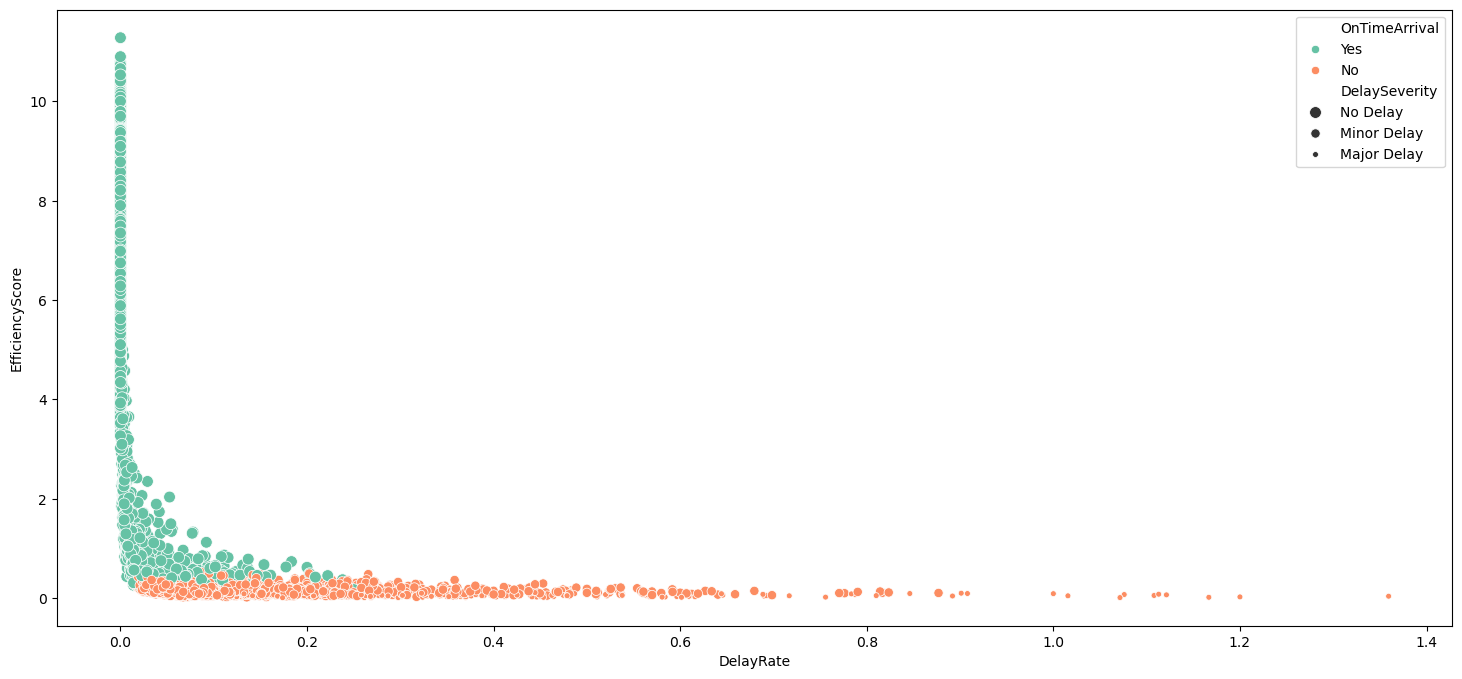

In [69]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x="DelayRate", y="EfficiencyScore", hue="OnTimeArrival", size="DelaySeverity", data=df, palette="Set2")
plt.show()

`FlightClass` vs `Revenue`

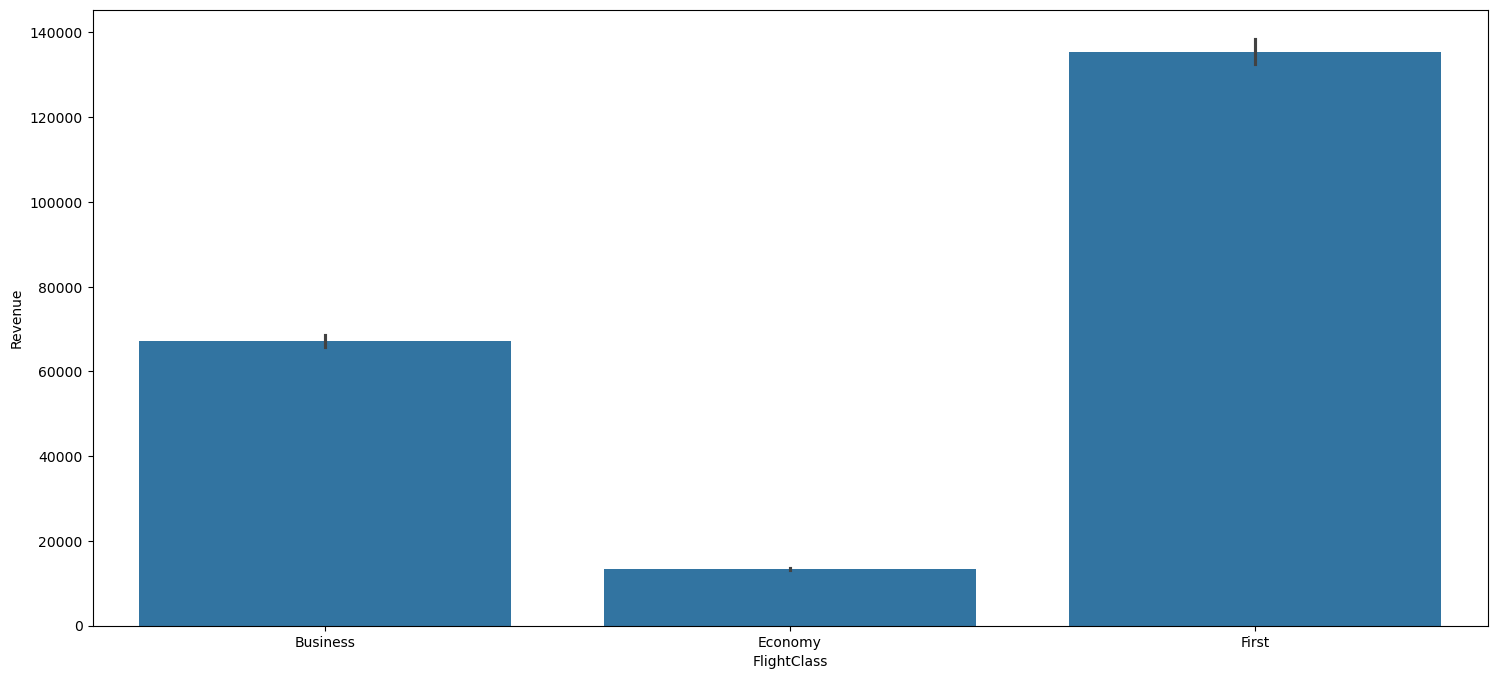

In [70]:
plt.figure(figsize=(18, 8))
sns.barplot(x="FlightClass", y="Revenue", data=df)
plt.show()